In [3]:
# for CNN refer this : 
# https://github.com/SUBHASISHBISWAS/SB-AI-DEV/blob/b130d80a880ac429b3d8f7f0eed887fcd9850512/DL/CNN/Pluralsight/Janani%20Ravi/Building%20Deep%20Learning%20Models%20Using%20PyTorch/SB/8-Building%20an%20Image%20Classification%20Model.ipynb

from IPython.display import Image
from random import randint
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#Notice at the very bottom we're using the ImageDataGenerator. 
# ImageDataGenerator is a TensorFlow object that allows us to pre‑process and work with image data. 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10


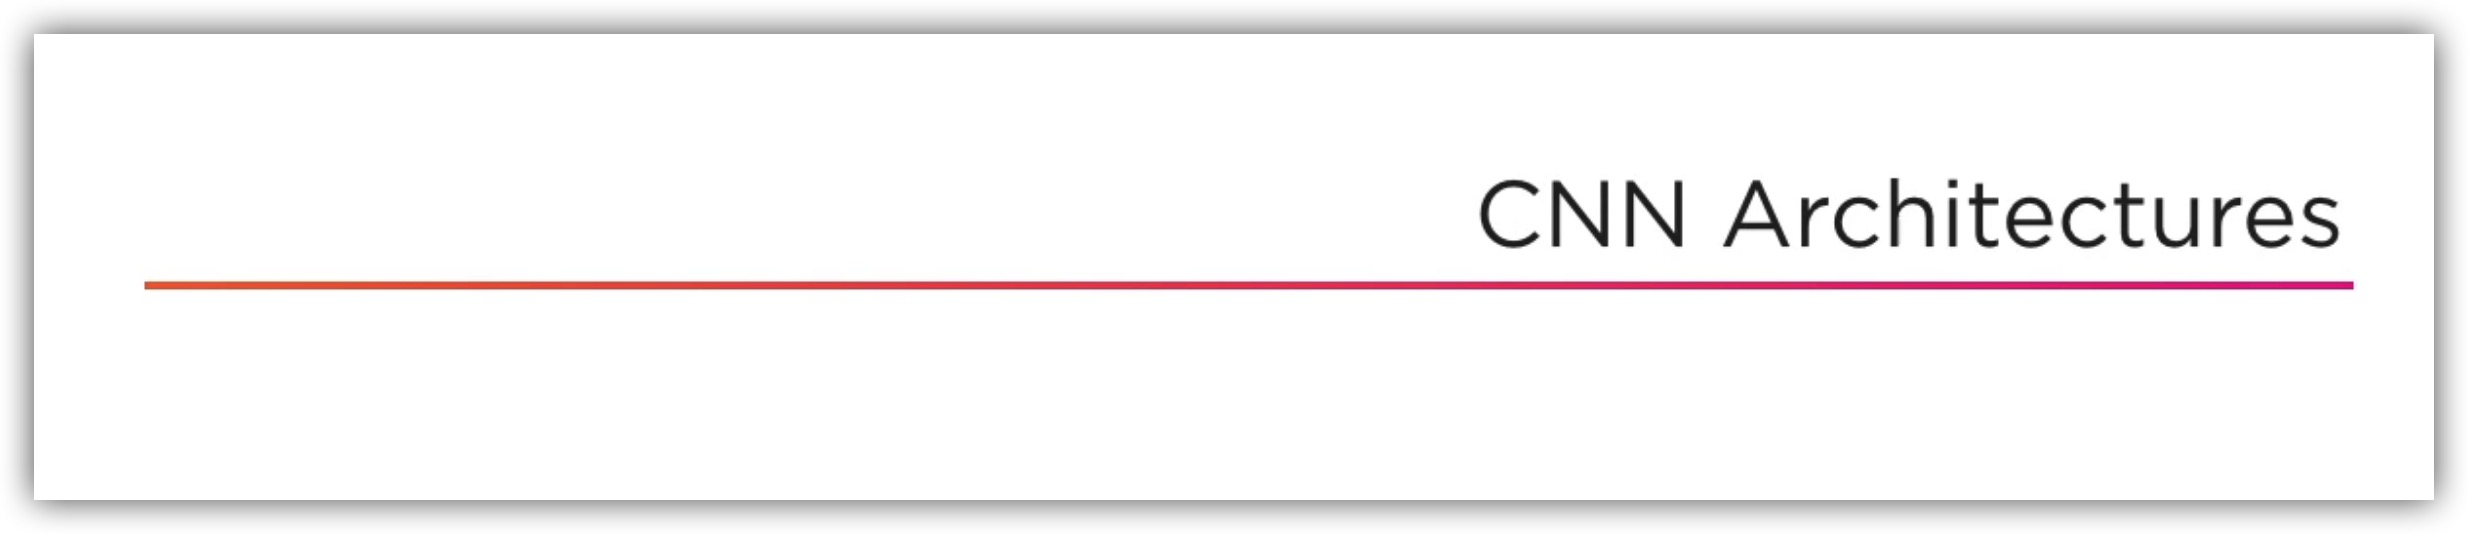

In [2]:
Image('/Users/subhasish/Development/GIT/Interstellar/SB-AI-DEV/DL/CNN/Pluralsight/Janani Ravi/Build a Machine Learning Workflow with Keras TensorFlow 2.0/SB/Images/2023-06-01_20-57-55.jpg')

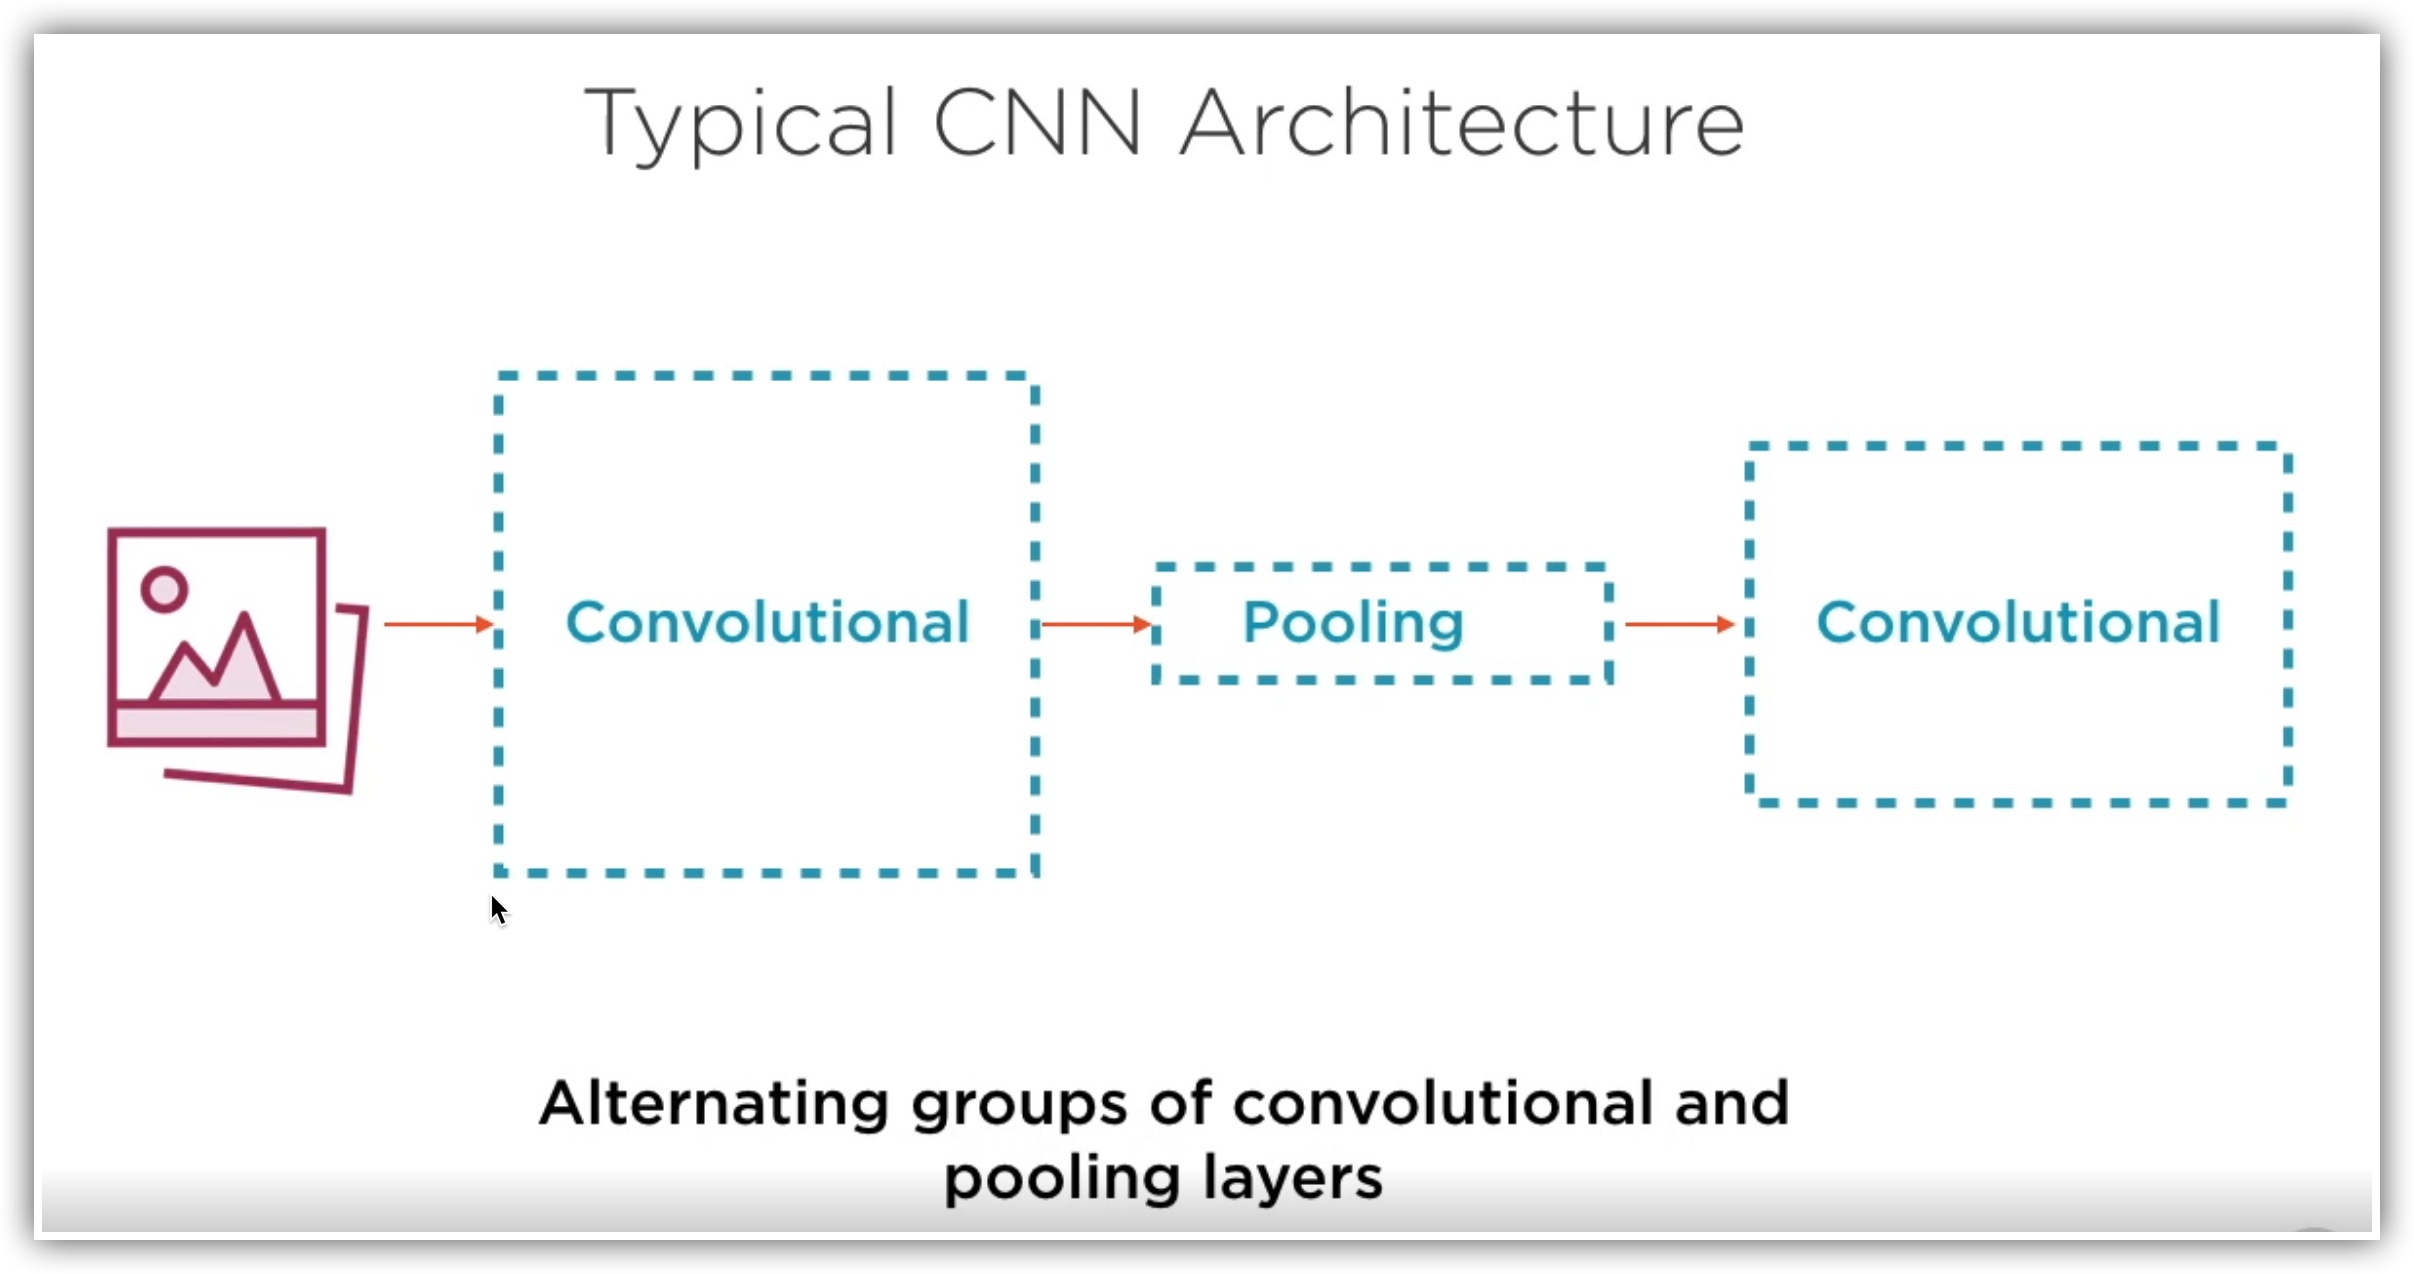

In [3]:
'''
The typical architecture of a CNN involves alternating groups of convolutional and pooling layers. 
So you'll pass the input through one or more convolutional layers. 

It will be followed by a pooling layer. 
The output of the pooling layer is passed on to more convolutional and pooling layers. 
'''
Image('/Users/subhasish/Development/GIT/Interstellar/SB-AI-DEV/DL/CNN/Pluralsight/Janani Ravi/Build a Machine Learning Workflow with Keras TensorFlow 2.0/SB/Images/2023-06-01_20-59-02.jpg')

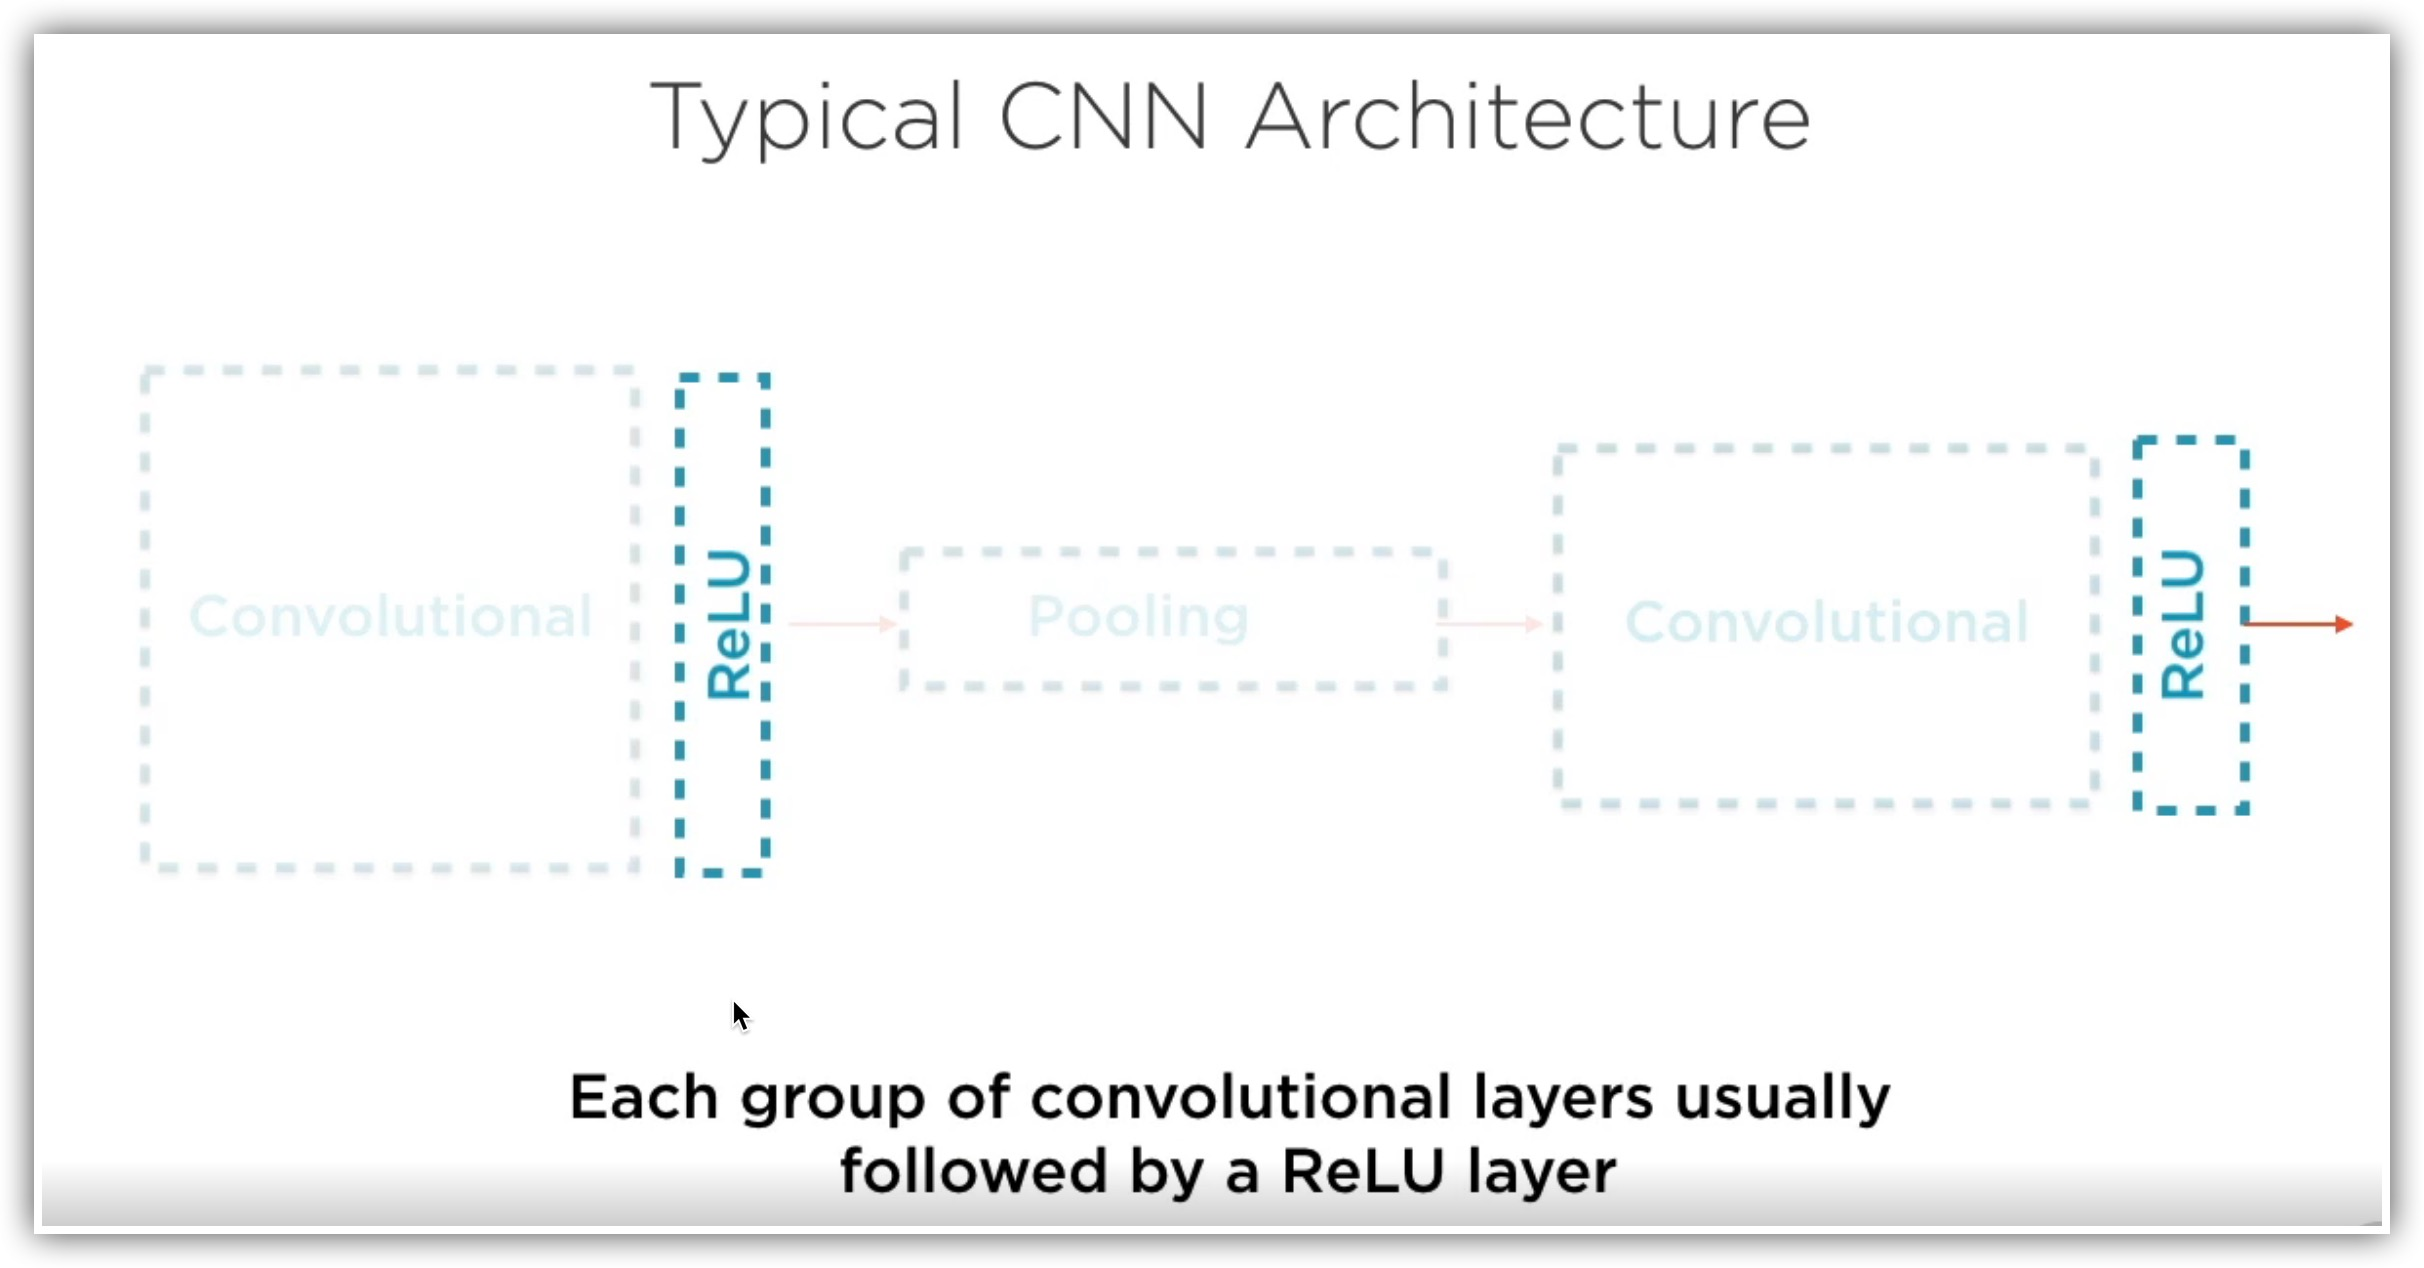

In [4]:
'''
 The most popular activation function used in a CNN is the ReLU activation. 
 So each group of convolutional layers is usually followed by a ReLU activation layer. 
'''
Image('/Users/subhasish/Development/GIT/Interstellar/SB-AI-DEV/DL/CNN/Pluralsight/Janani Ravi/Build a Machine Learning Workflow with Keras TensorFlow 2.0/SB/Images/2023-06-01_21-00-36.jpg')

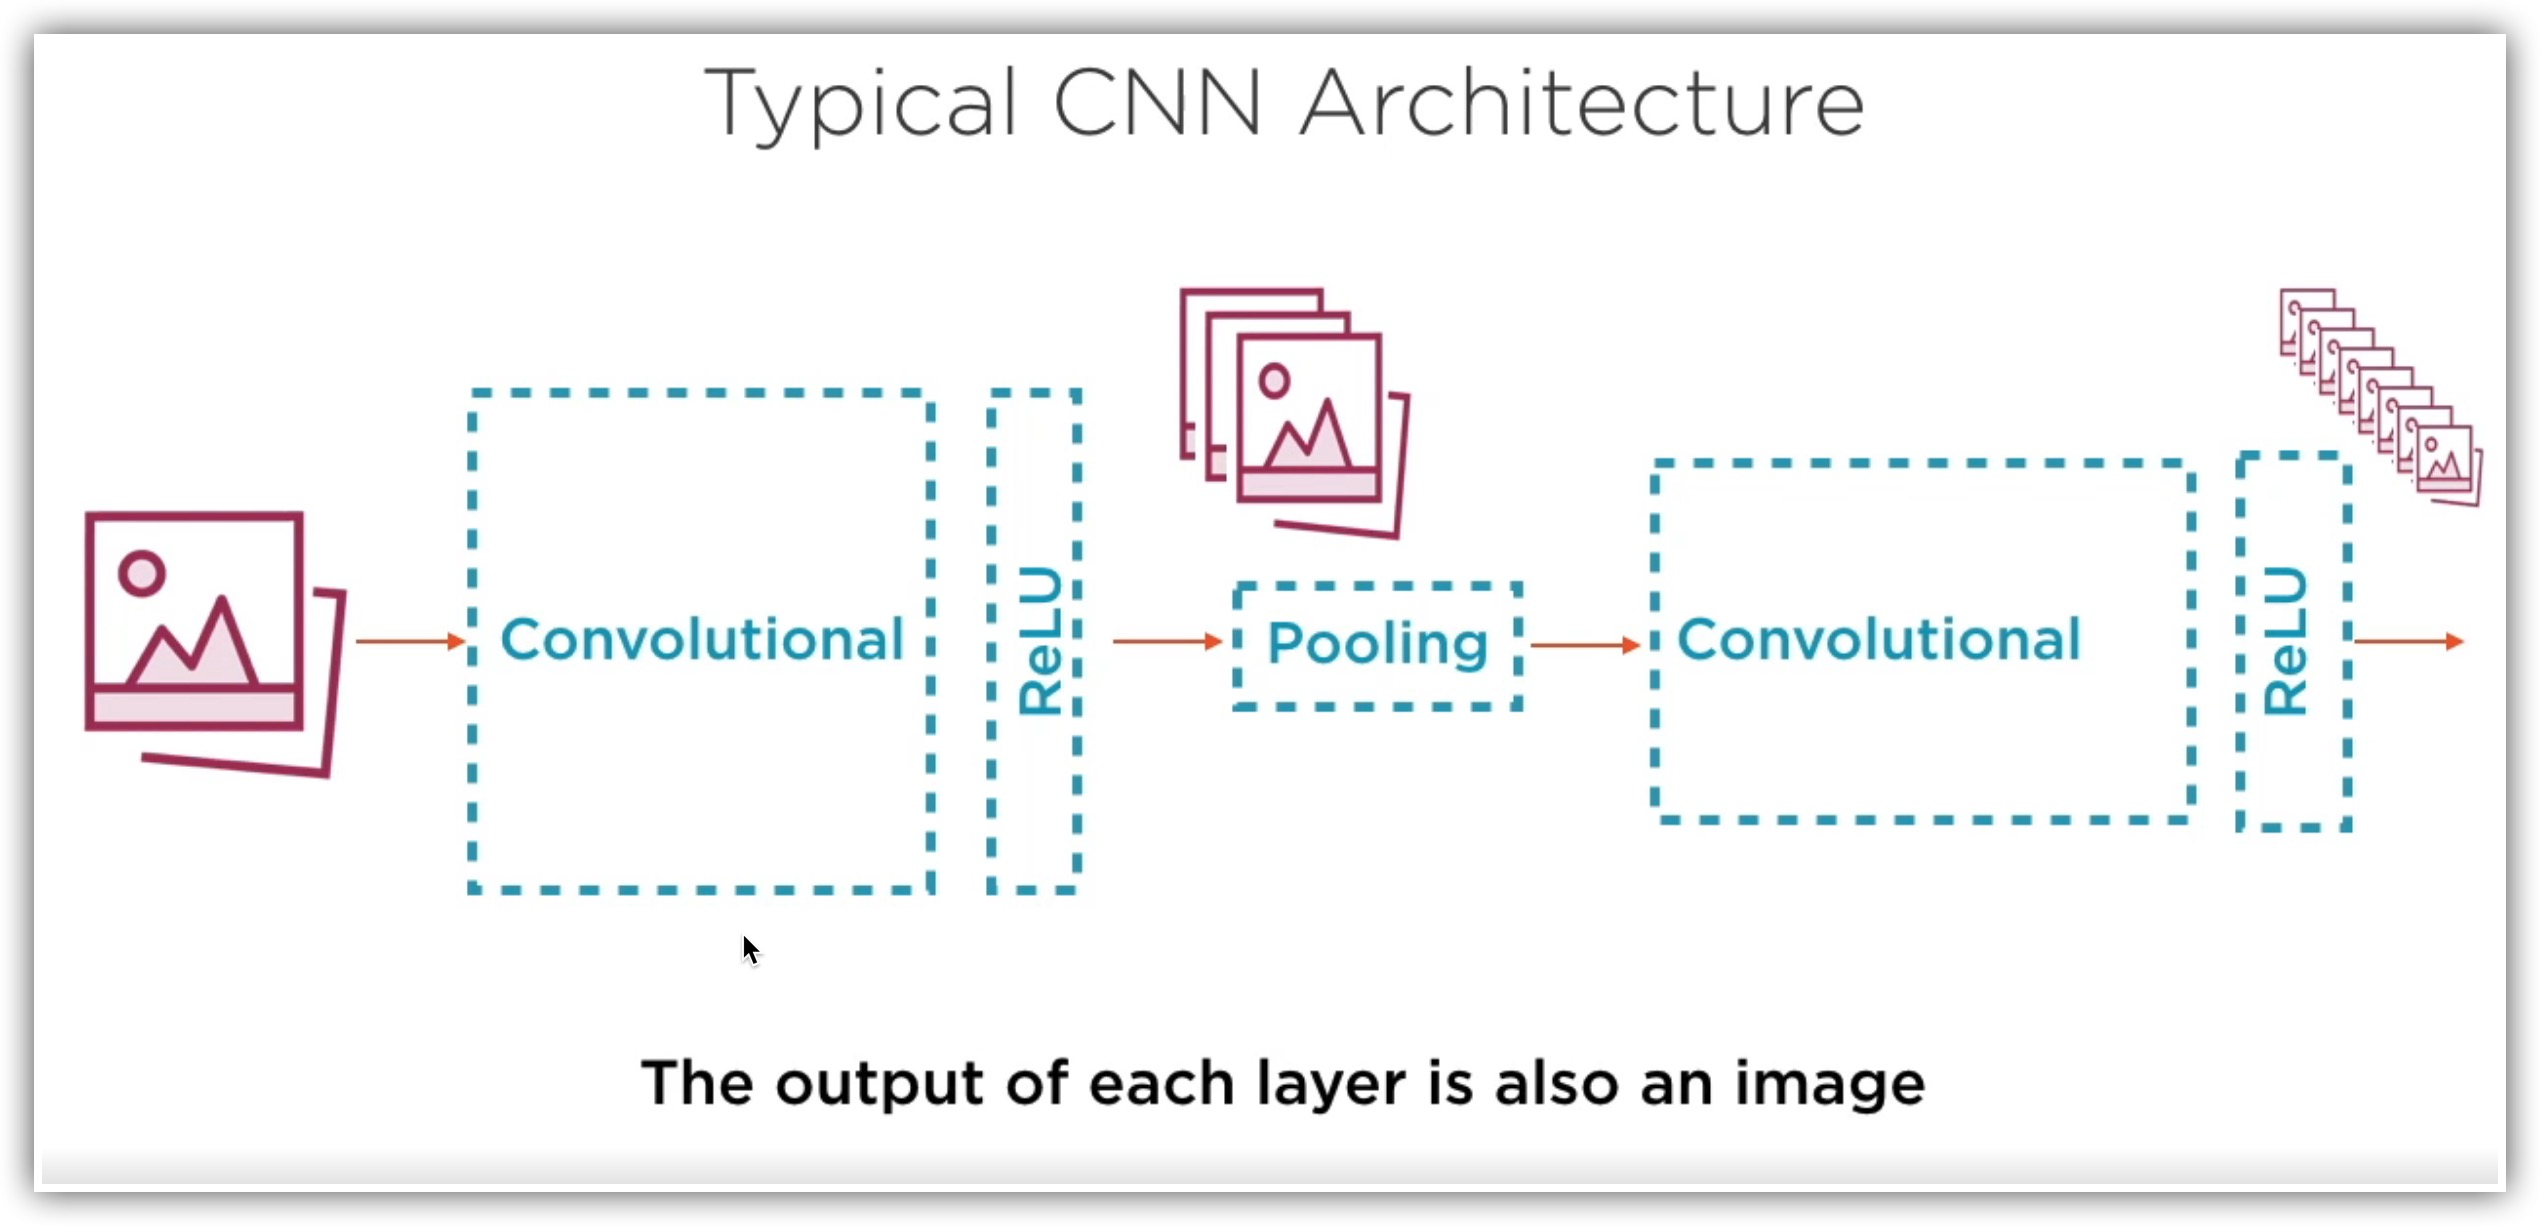

In [5]:
'''
The input to a convolutional neural network and the input to each layer of a 
convolutional neural network is an image. 

That's because the output of each of these layers, whether they are convolutional 
layers or pooling layers, are also images. 
 
'''
Image('/Users/subhasish/Development/GIT/Interstellar/SB-AI-DEV/DL/CNN/Pluralsight/Janani Ravi/Build a Machine Learning Workflow with Keras TensorFlow 2.0/SB/Images/2023-06-01_21-01-40.jpg')

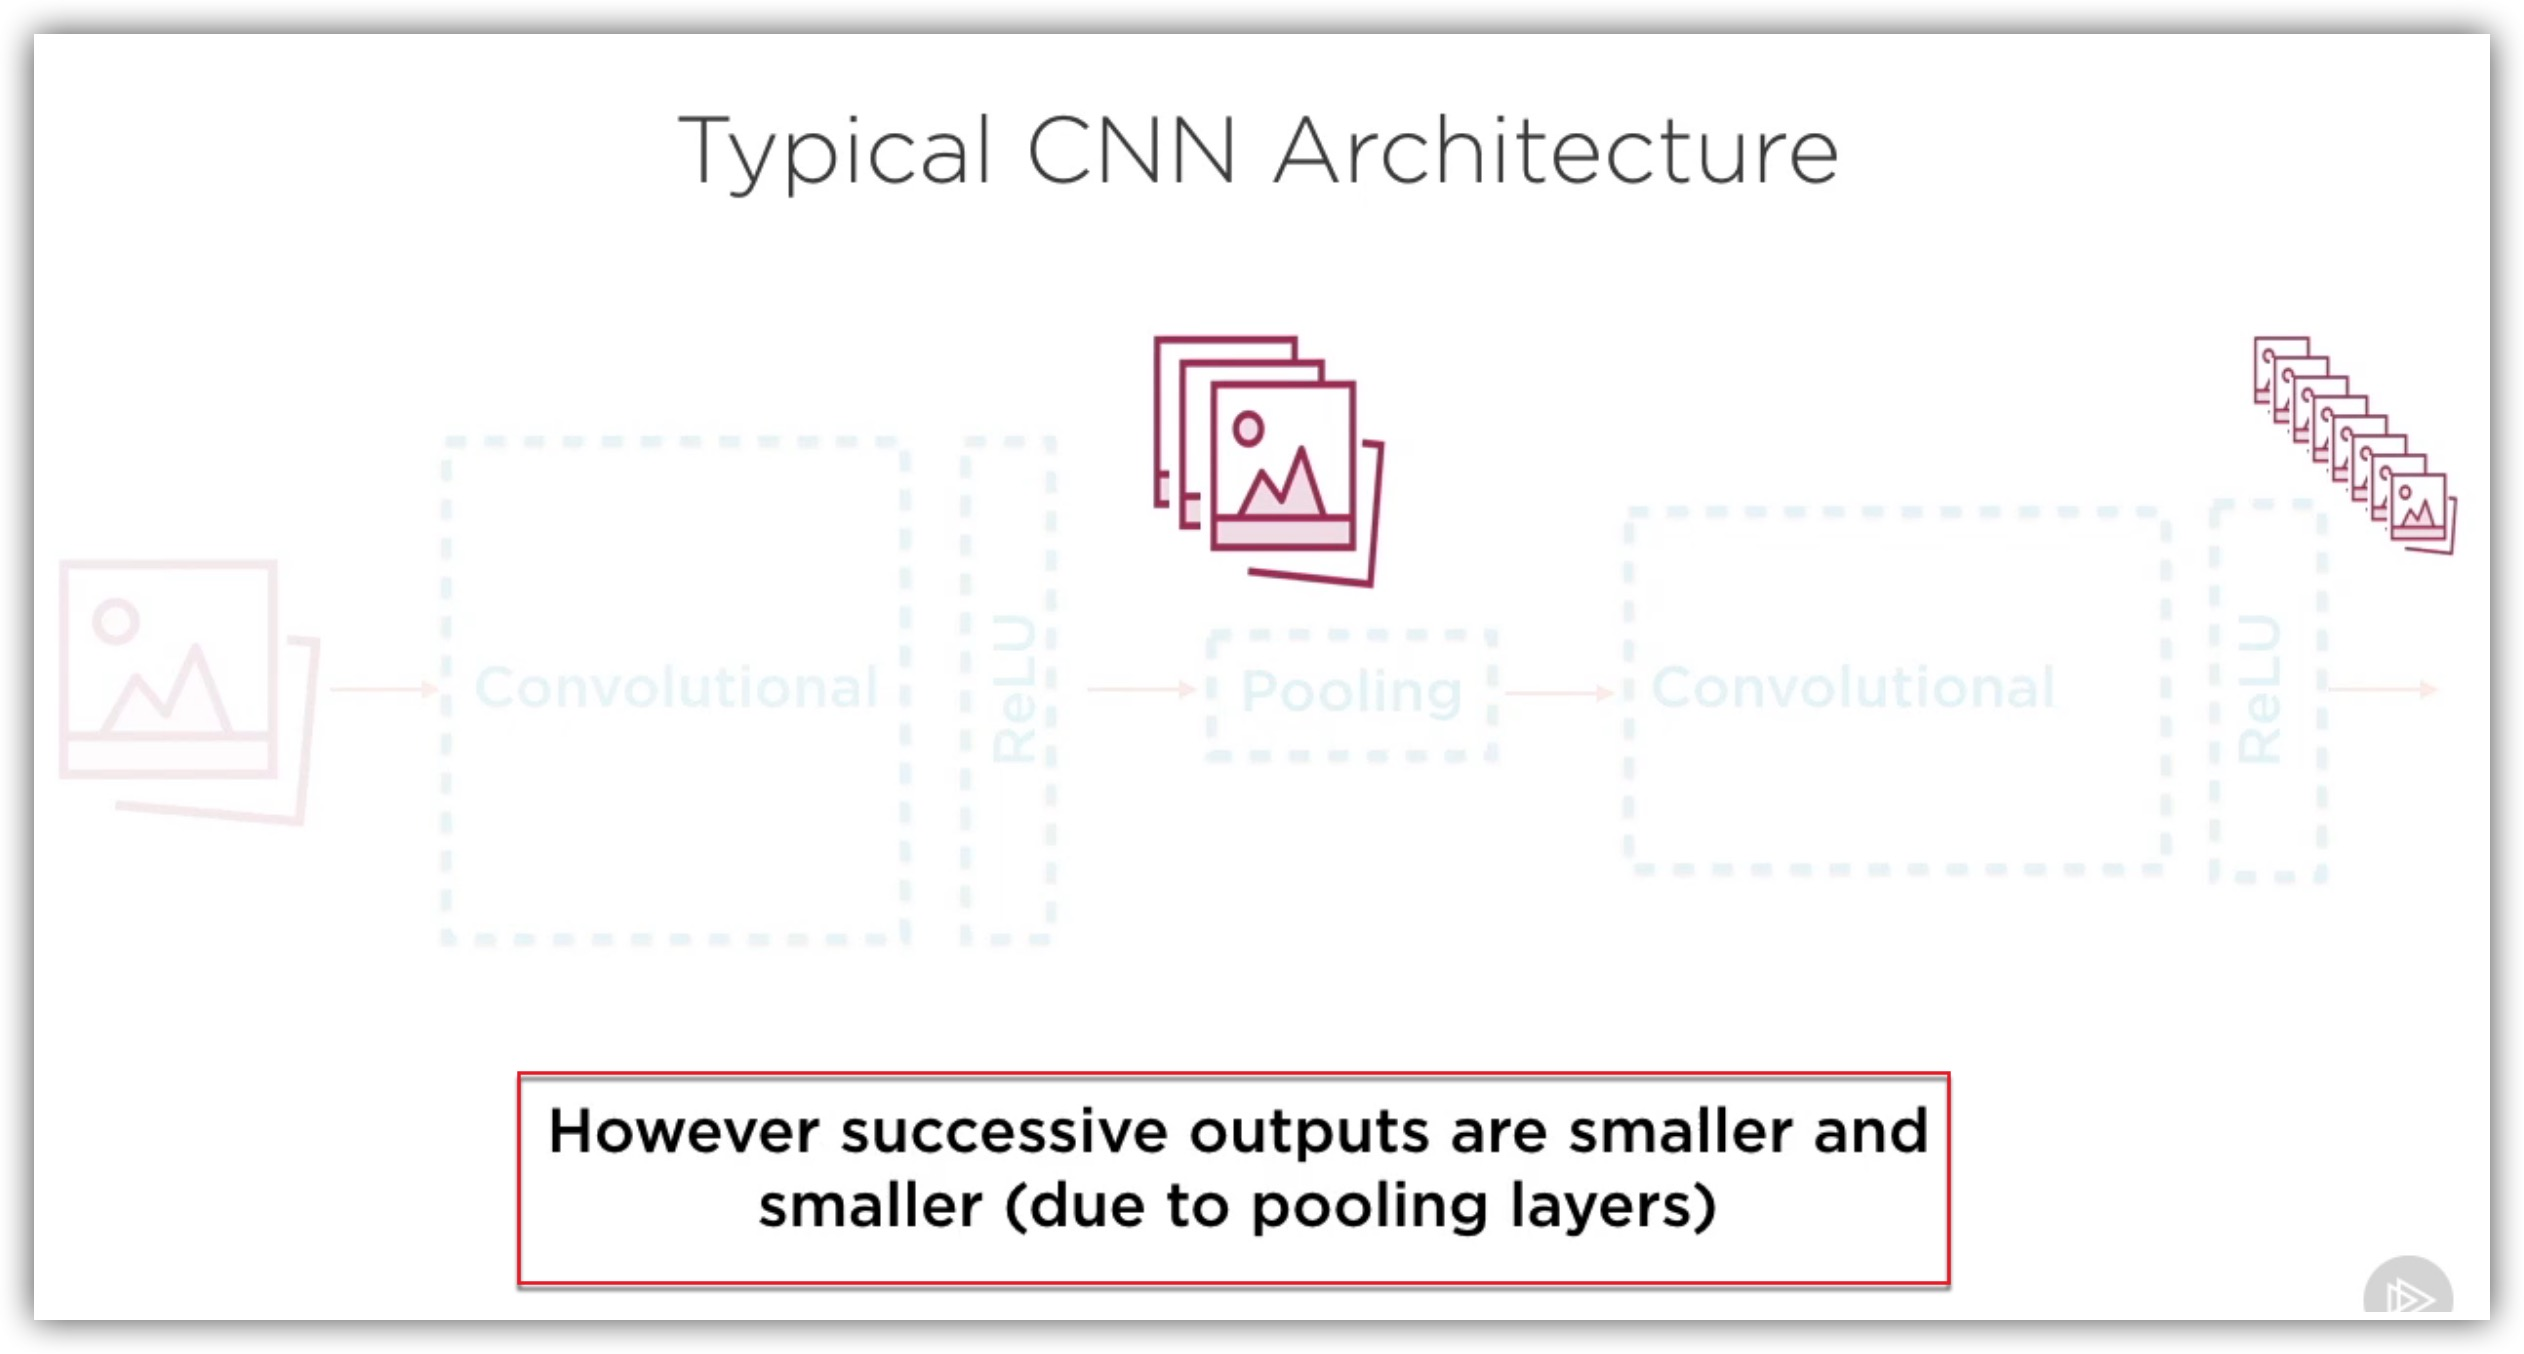

In [6]:
'''
As your input image passes through the convolutional neural network and gets 
transformed by convolutional and pooling layers, your image becomes smaller and smaller. 

This is because of the aggregation operations that are performed in the pooling layers.
'''
Image('/Users/subhasish/Development/GIT/Interstellar/SB-AI-DEV/DL/CNN/Pluralsight/Janani Ravi/Build a Machine Learning Workflow with Keras TensorFlow 2.0/SB/Images/2023-06-01_21-02-59.jpg')

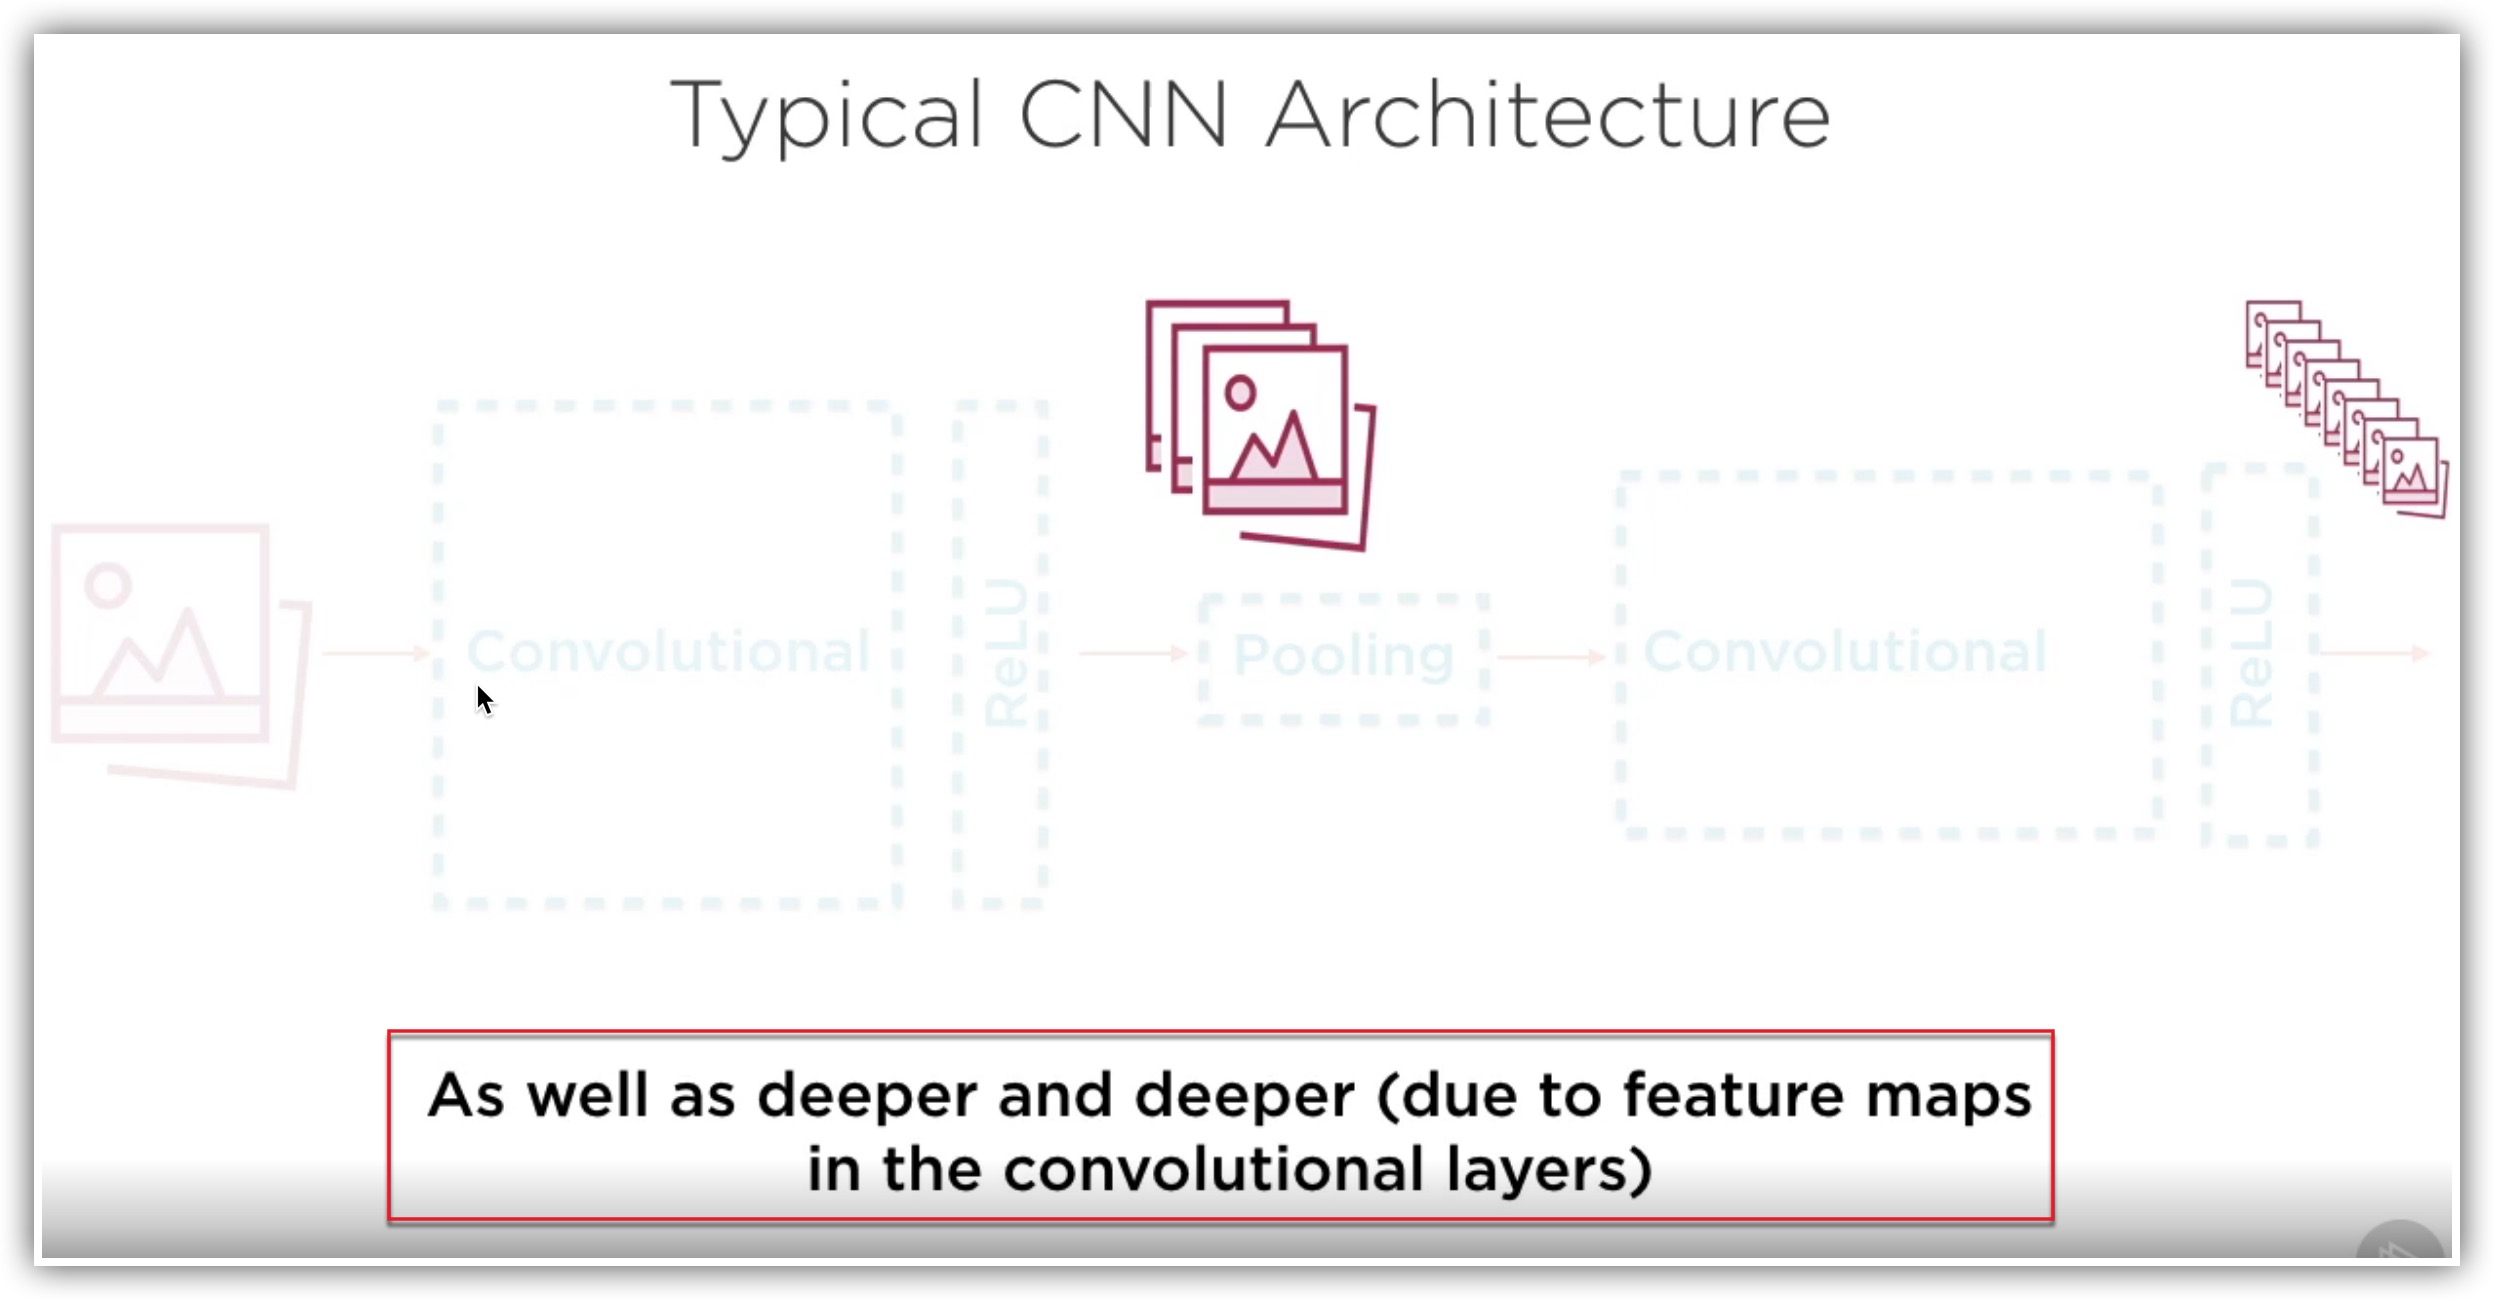

In [7]:
'''
Your images also become deeper and deeper as more and more feature maps are generated 
thanks to the convolutional layers.

So you may start with a single channel gray‑scale image or a multi‑channel RGB image, but at the 
end of the convolutional and pooling layers, you'll have a much smaller image in terms of height and width, 
but a much deeper image in terms of the number of feature maps that your image has. 
'''

Image('/Users/subhasish/Development/GIT/Interstellar/SB-AI-DEV/DL/CNN/Pluralsight/Janani Ravi/Build a Machine Learning Workflow with Keras TensorFlow 2.0/SB/Images/2023-06-01_21-04-37.jpg')

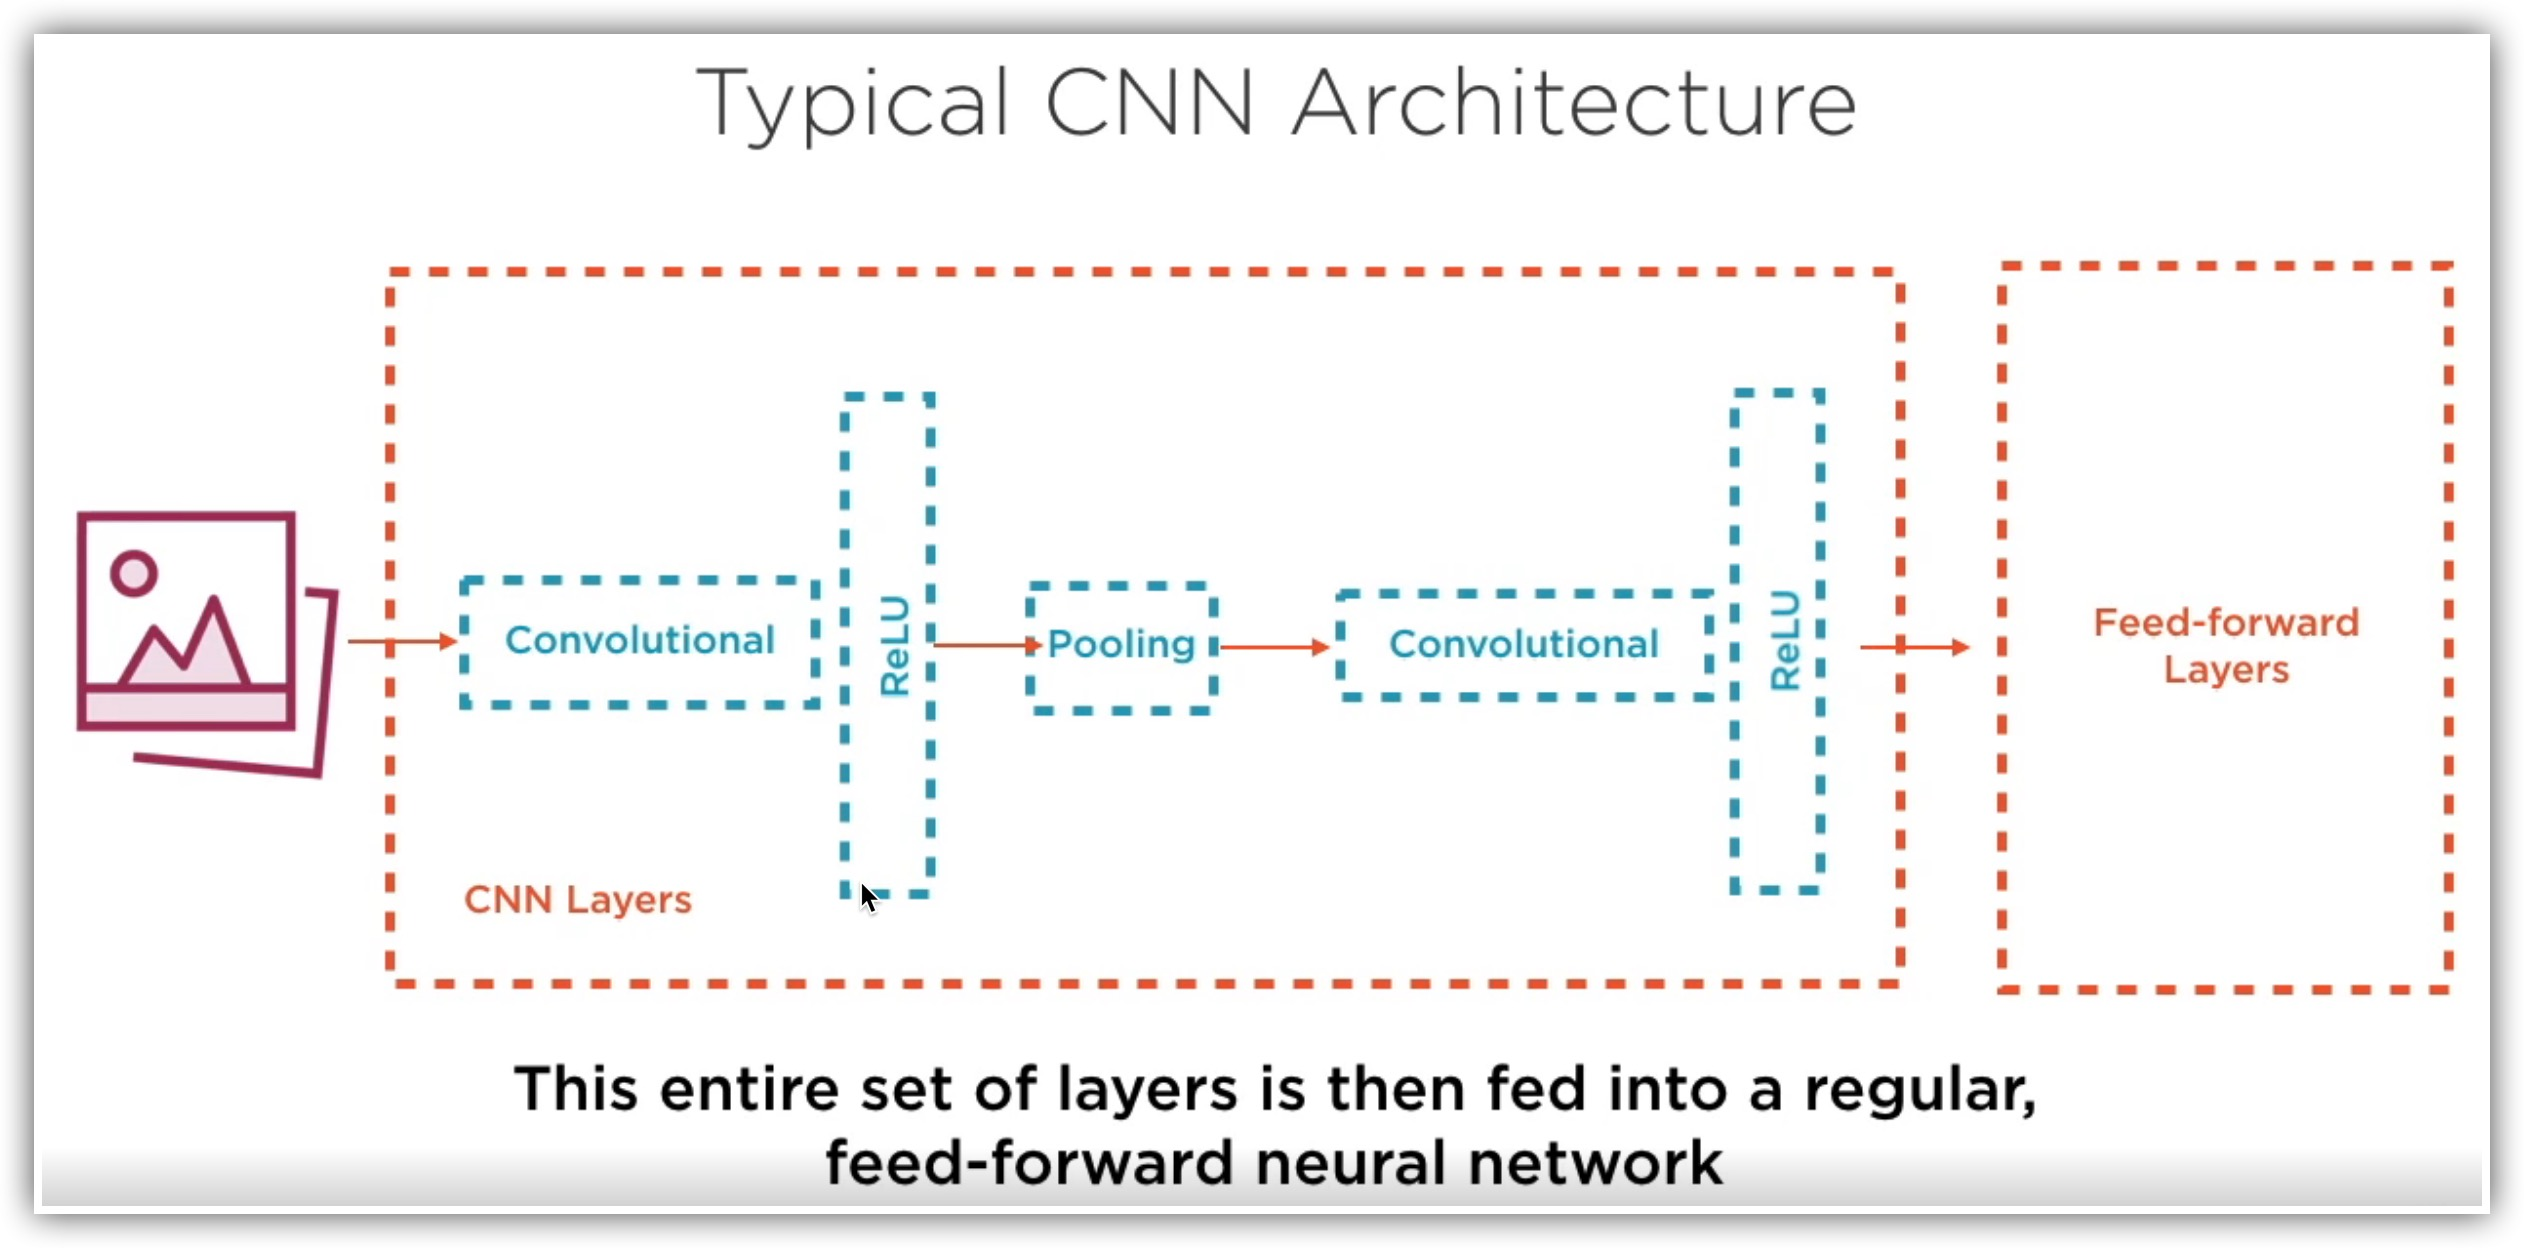

In [9]:
'''
The output generated by convolutional and pooling layers is then fed into a regular feed‑forward neural network. 
This is a dense neural network with linear layers and activation functions. 

The output of the convolutional and pooling layers are in two dimensions in terms of feature maps. 

These feature maps are flattened and then passed into the feed‑forward network.
'''
Image('/Users/subhasish/Development/GIT/Interstellar/SB-AI-DEV/DL/CNN/Pluralsight/Janani Ravi/Build a Machine Learning Workflow with Keras TensorFlow 2.0/SB/Images/2023-06-01_21-07-25.jpg')

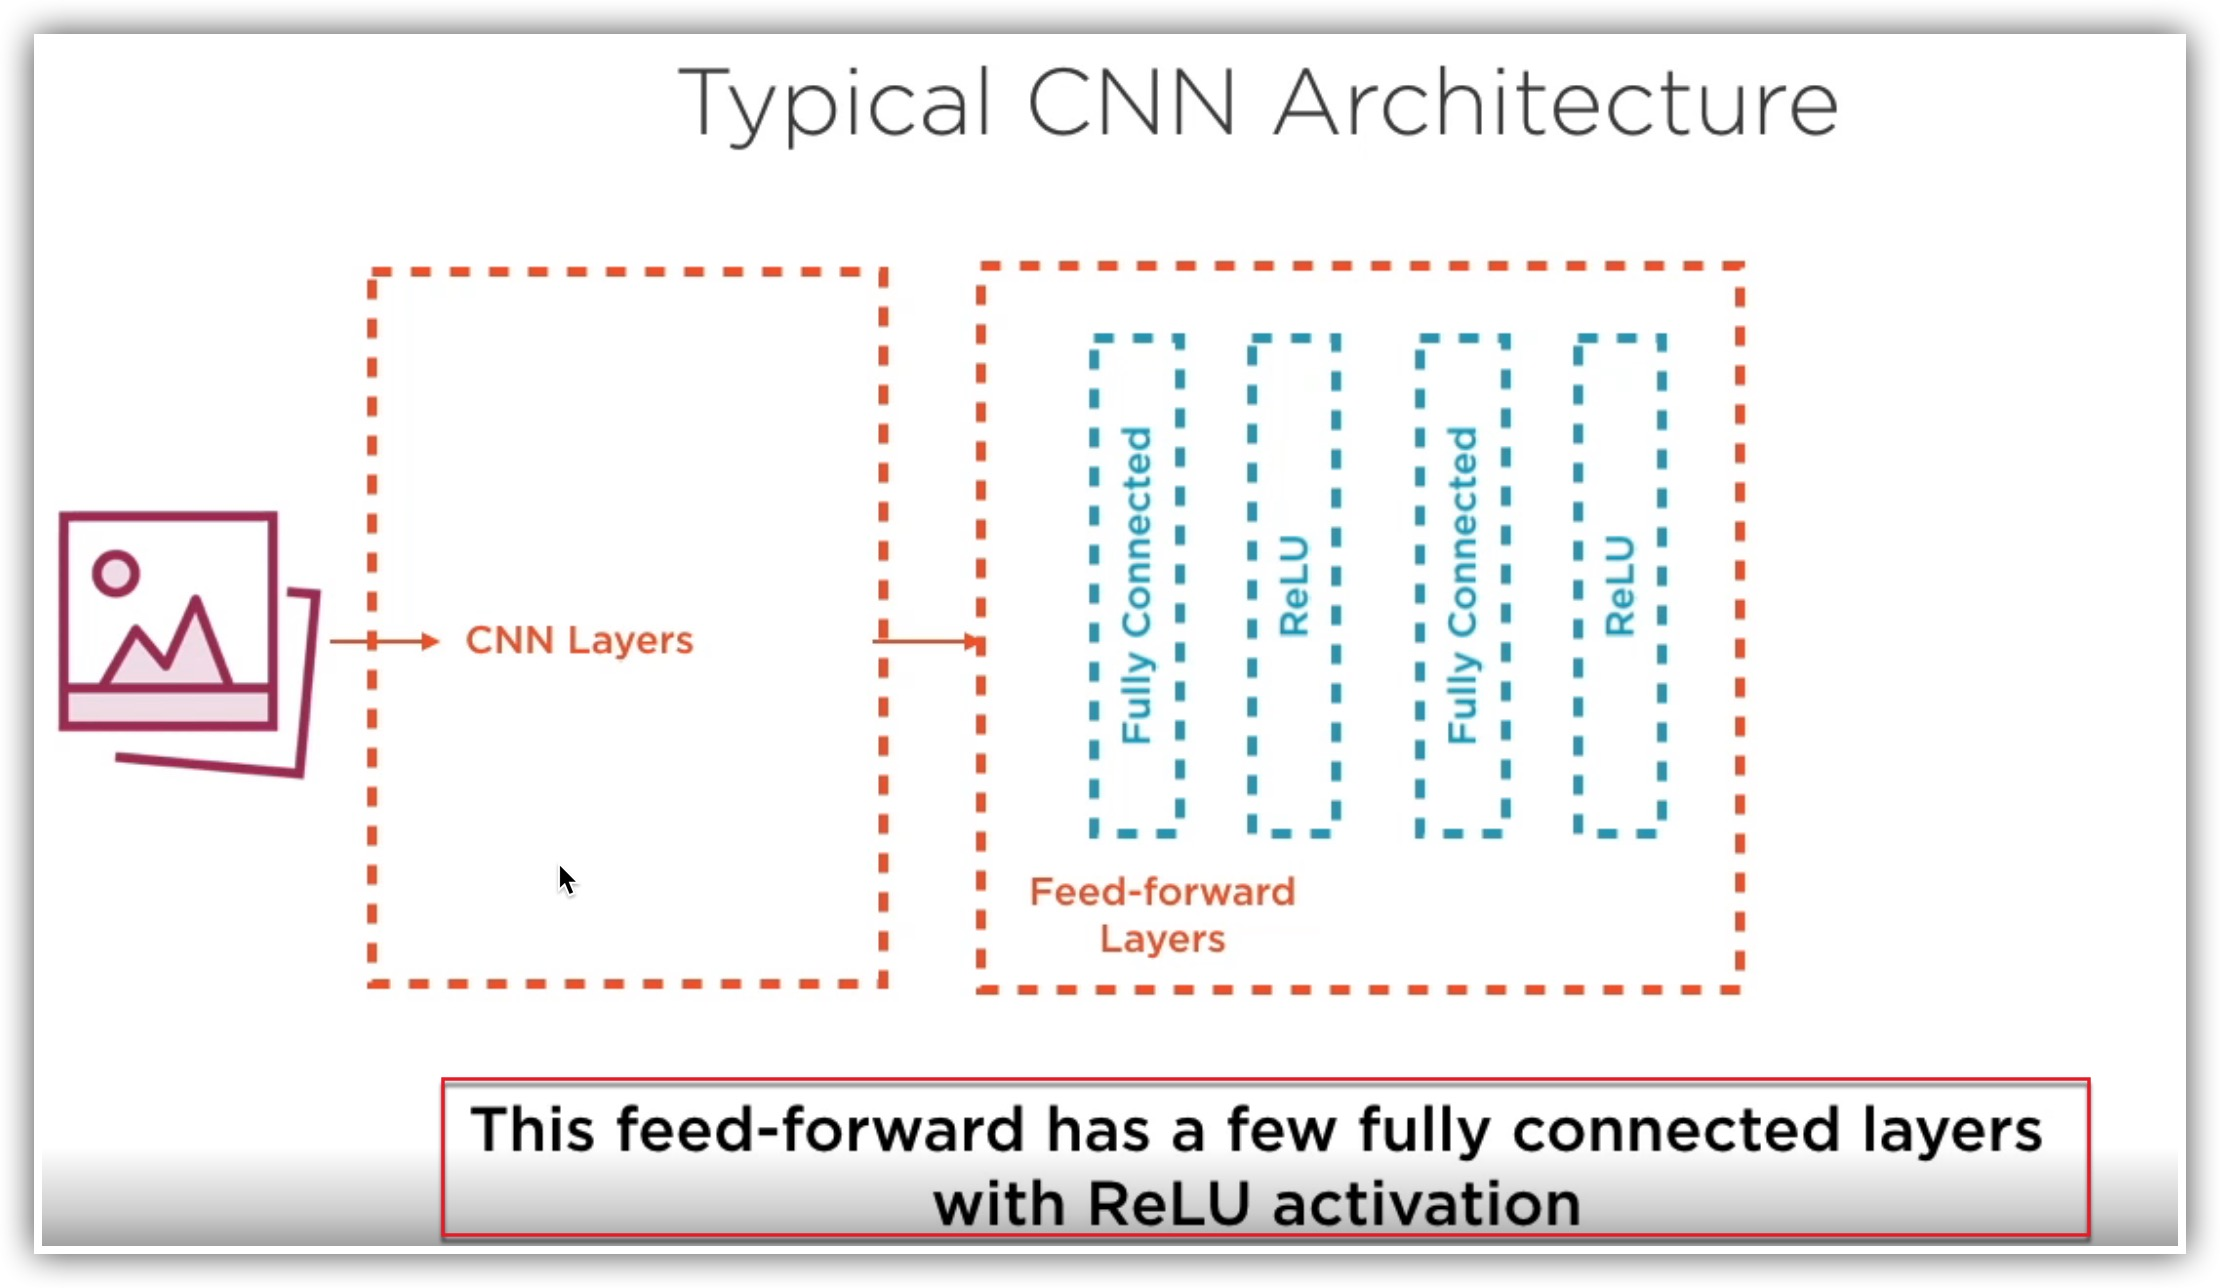

In [10]:
'''
The feed‑forward network typically consists of dense fully connected layers using ReLU activation. 
'''
Image('/Users/subhasish/Development/GIT/Interstellar/SB-AI-DEV/DL/CNN/Pluralsight/Janani Ravi/Build a Machine Learning Workflow with Keras TensorFlow 2.0/SB/Images/2023-06-01_21-08-39.jpg')

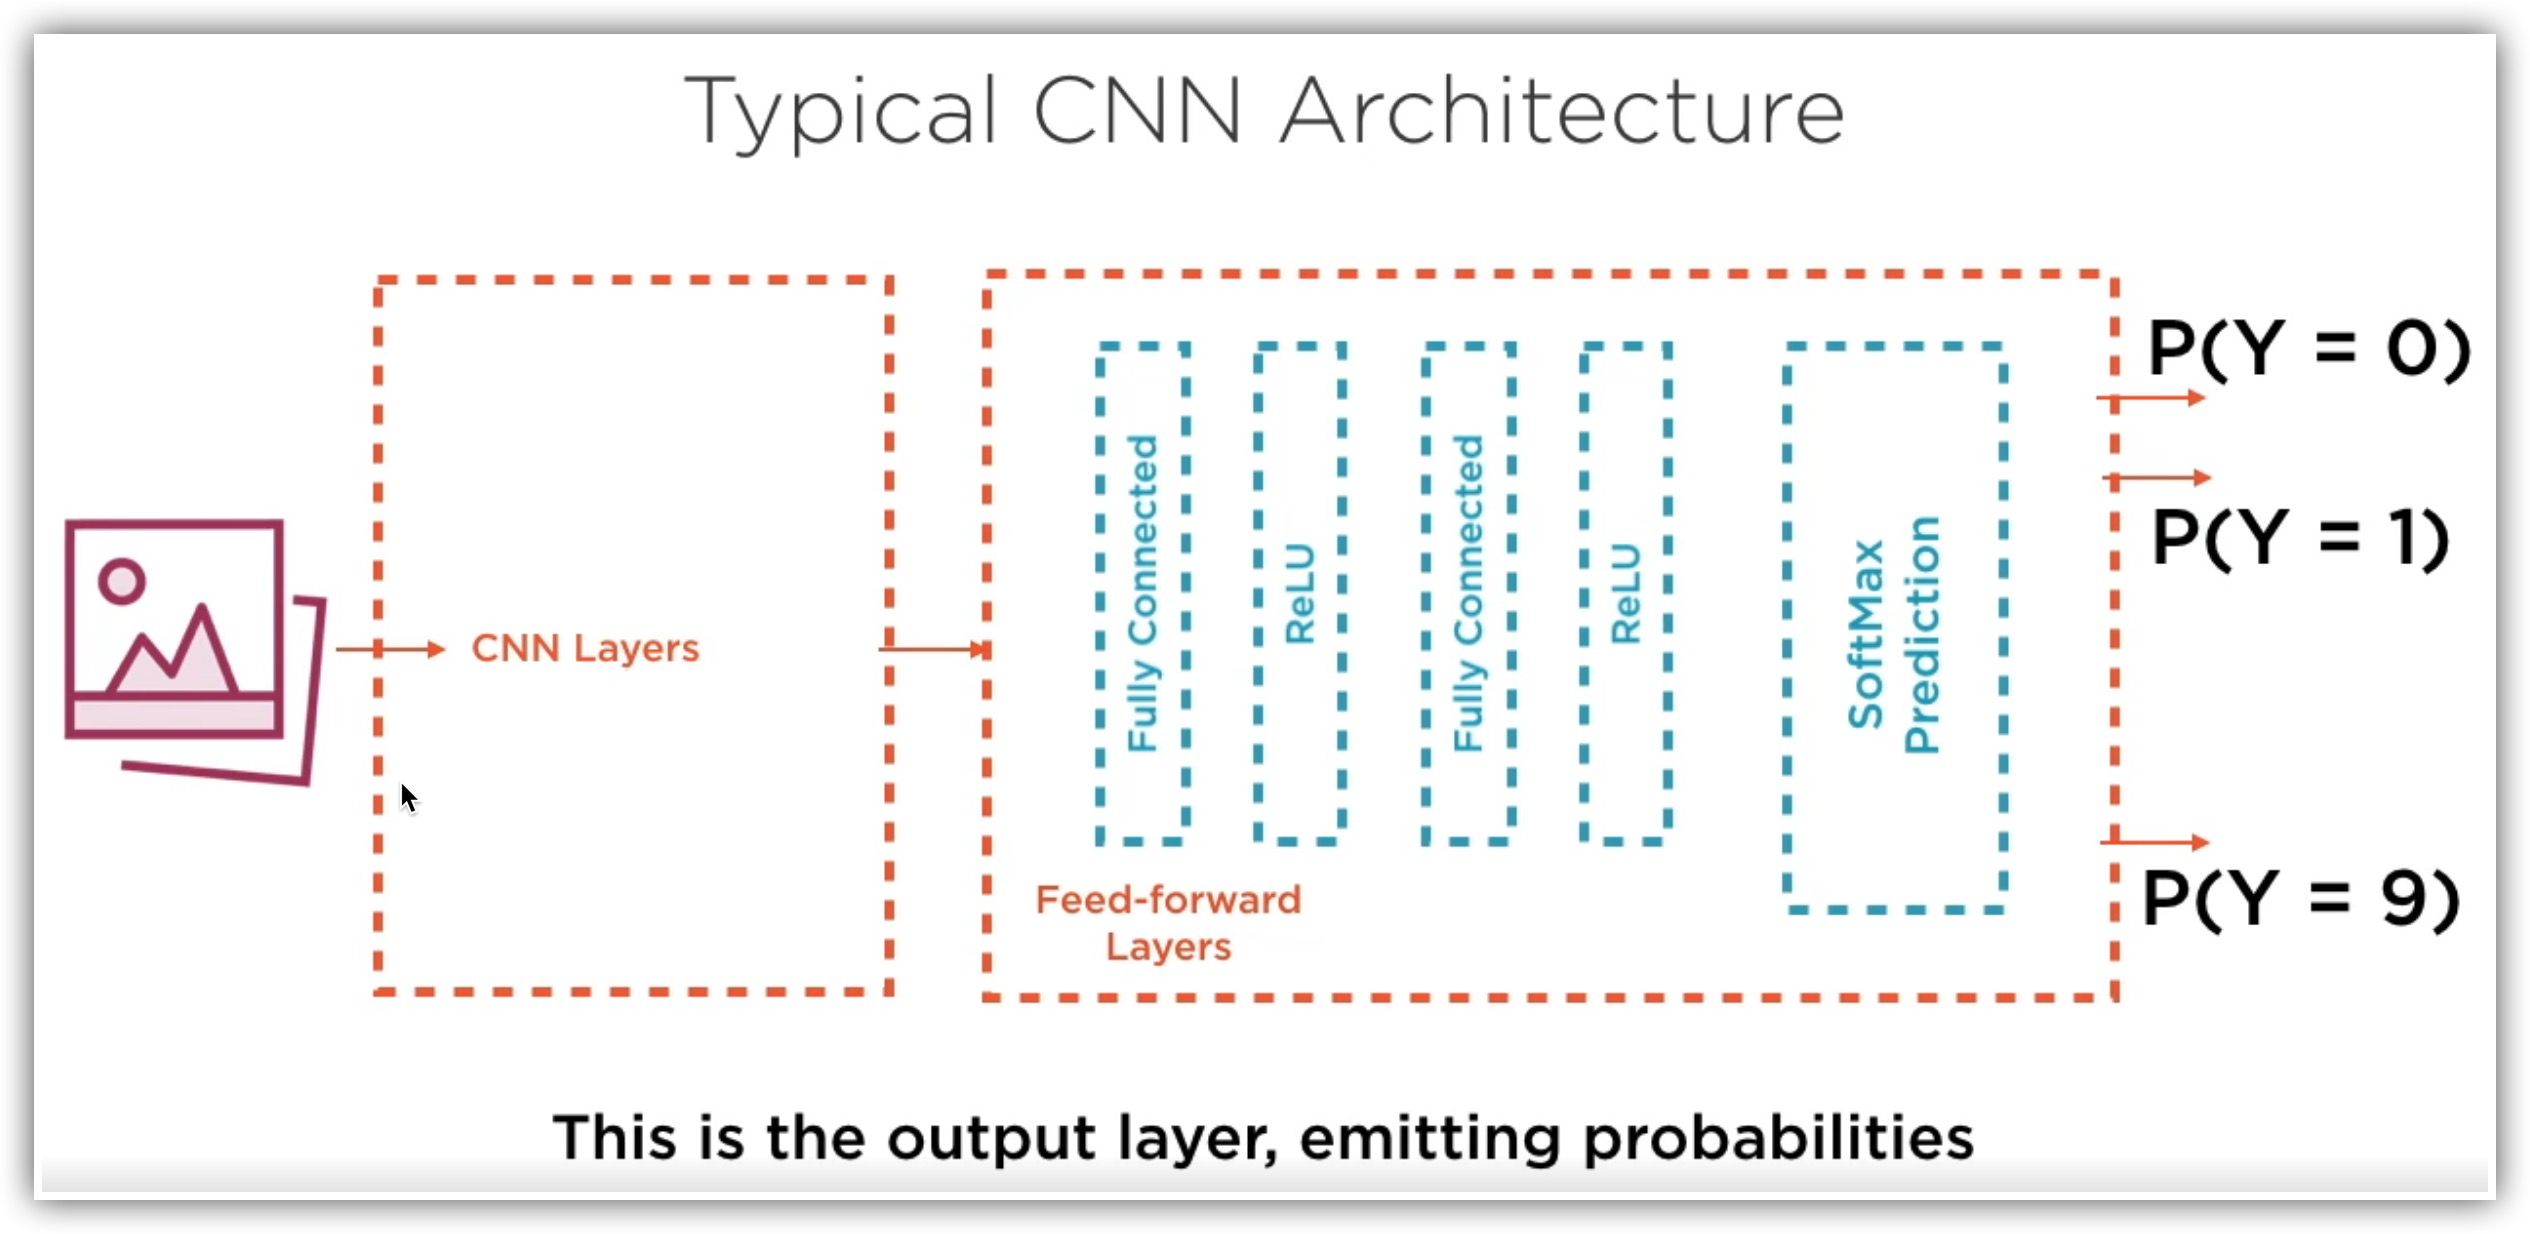

In [11]:
'''
The final layer in the convolutional neural network is a prediction layer, 
and a standard activation function for prediction is the SoftMax function, which can be used 
with multiple classes or categories.

When used with image classification problems, this final output layer emits the probability 
that a particular image belongs to a particular class or category. 

So if you consider a convolutional neural network meant for image classification, 
the input is an image, the outputs are probabilities corresponding to the 
classes or categories associated with that image.
'''
Image('/Users/subhasish/Development/GIT/Interstellar/SB-AI-DEV/DL/CNN/Pluralsight/Janani Ravi/Build a Machine Learning Workflow with Keras TensorFlow 2.0/SB/Images/2023-06-01_21-09-35.jpg')

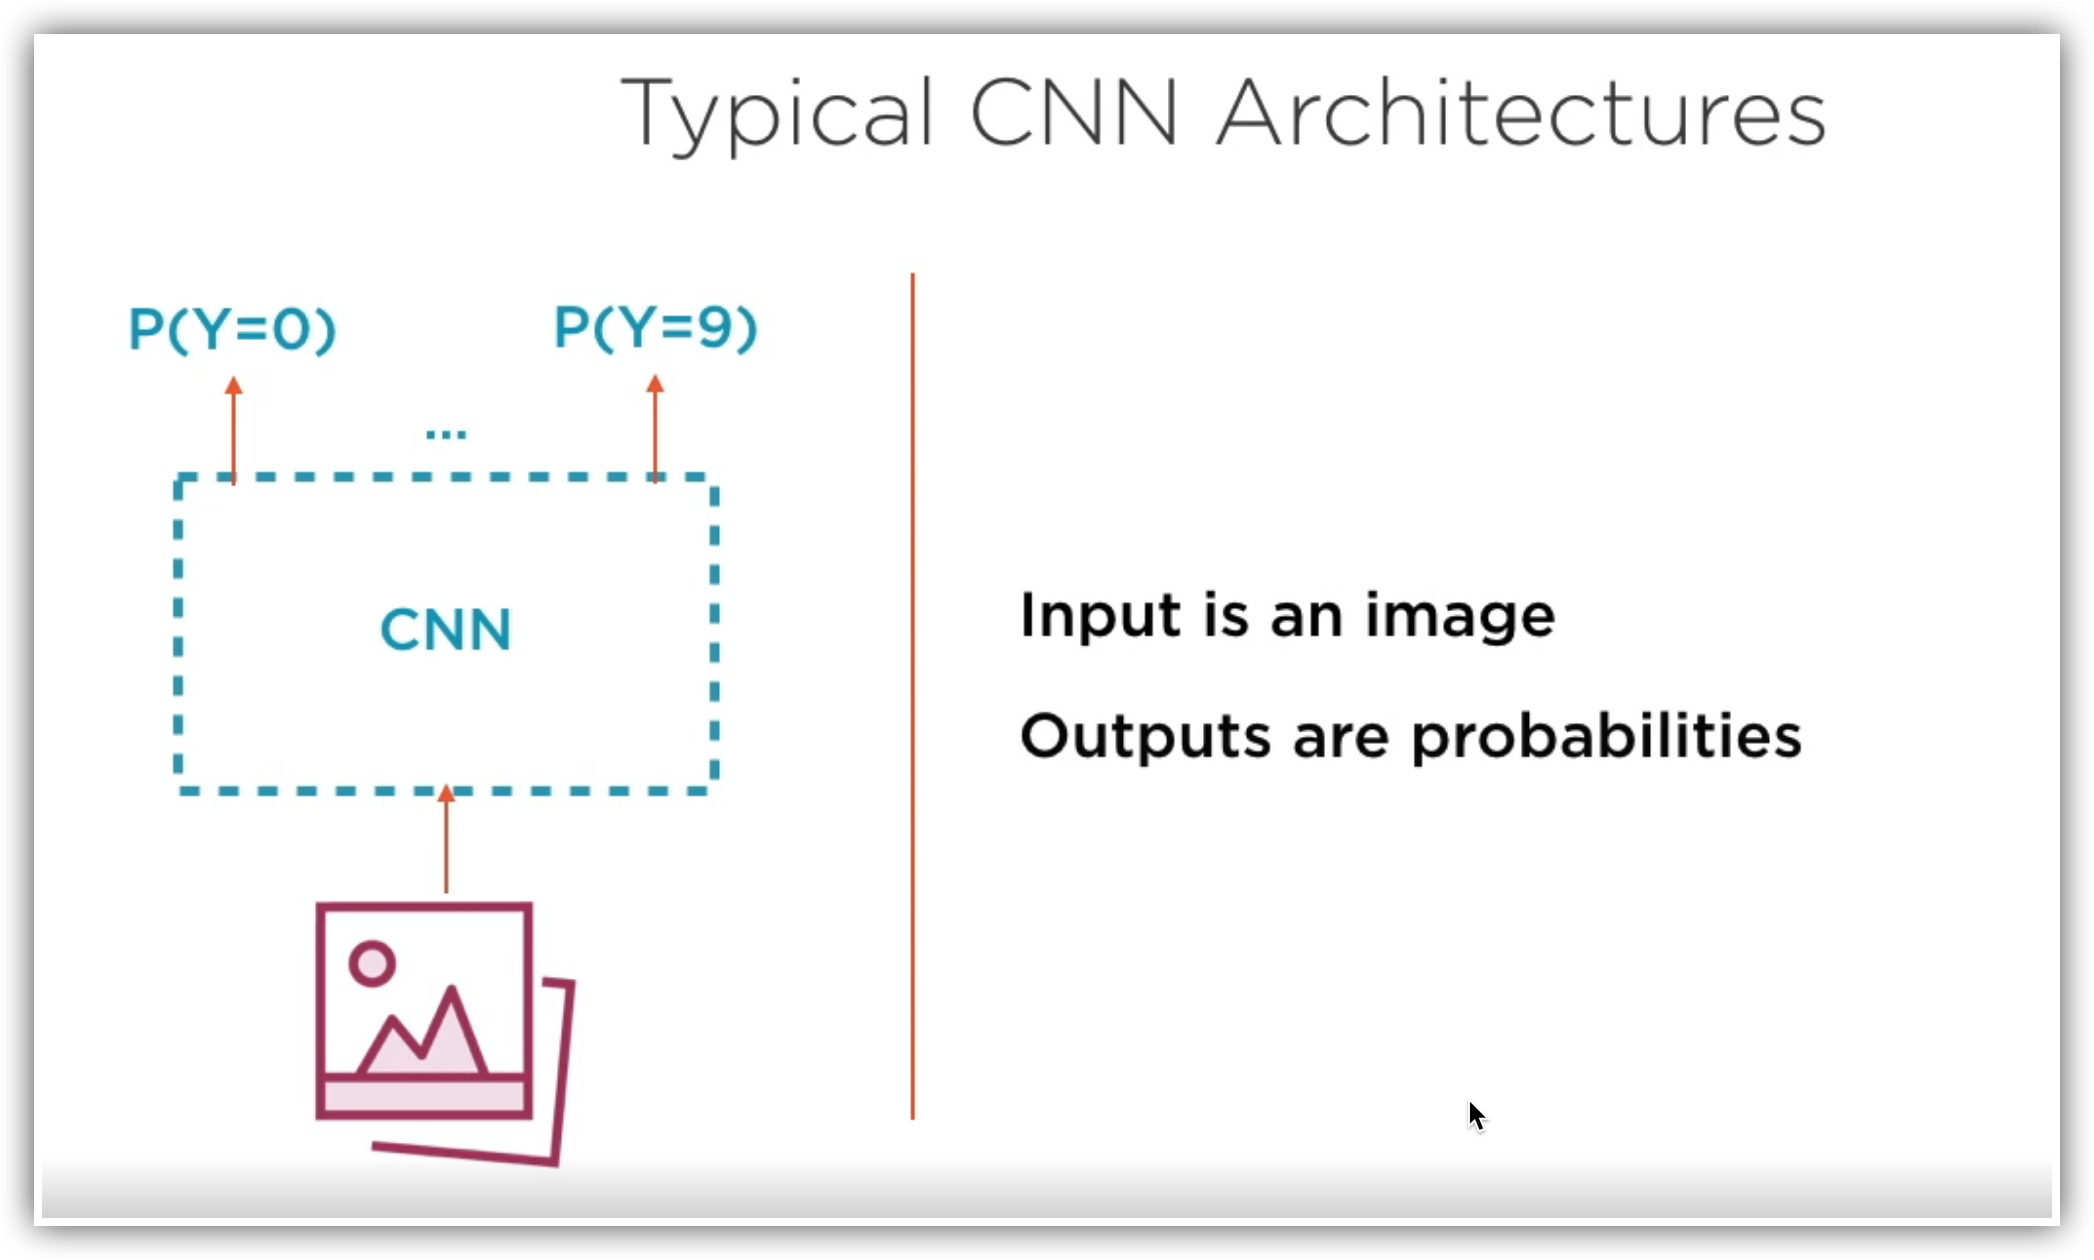

In [12]:
Image('/Users/subhasish/Development/GIT/Interstellar/SB-AI-DEV/DL/CNN/Pluralsight/Janani Ravi/Build a Machine Learning Workflow with Keras TensorFlow 2.0/SB/Images/2023-06-01_21-11-32.jpg')

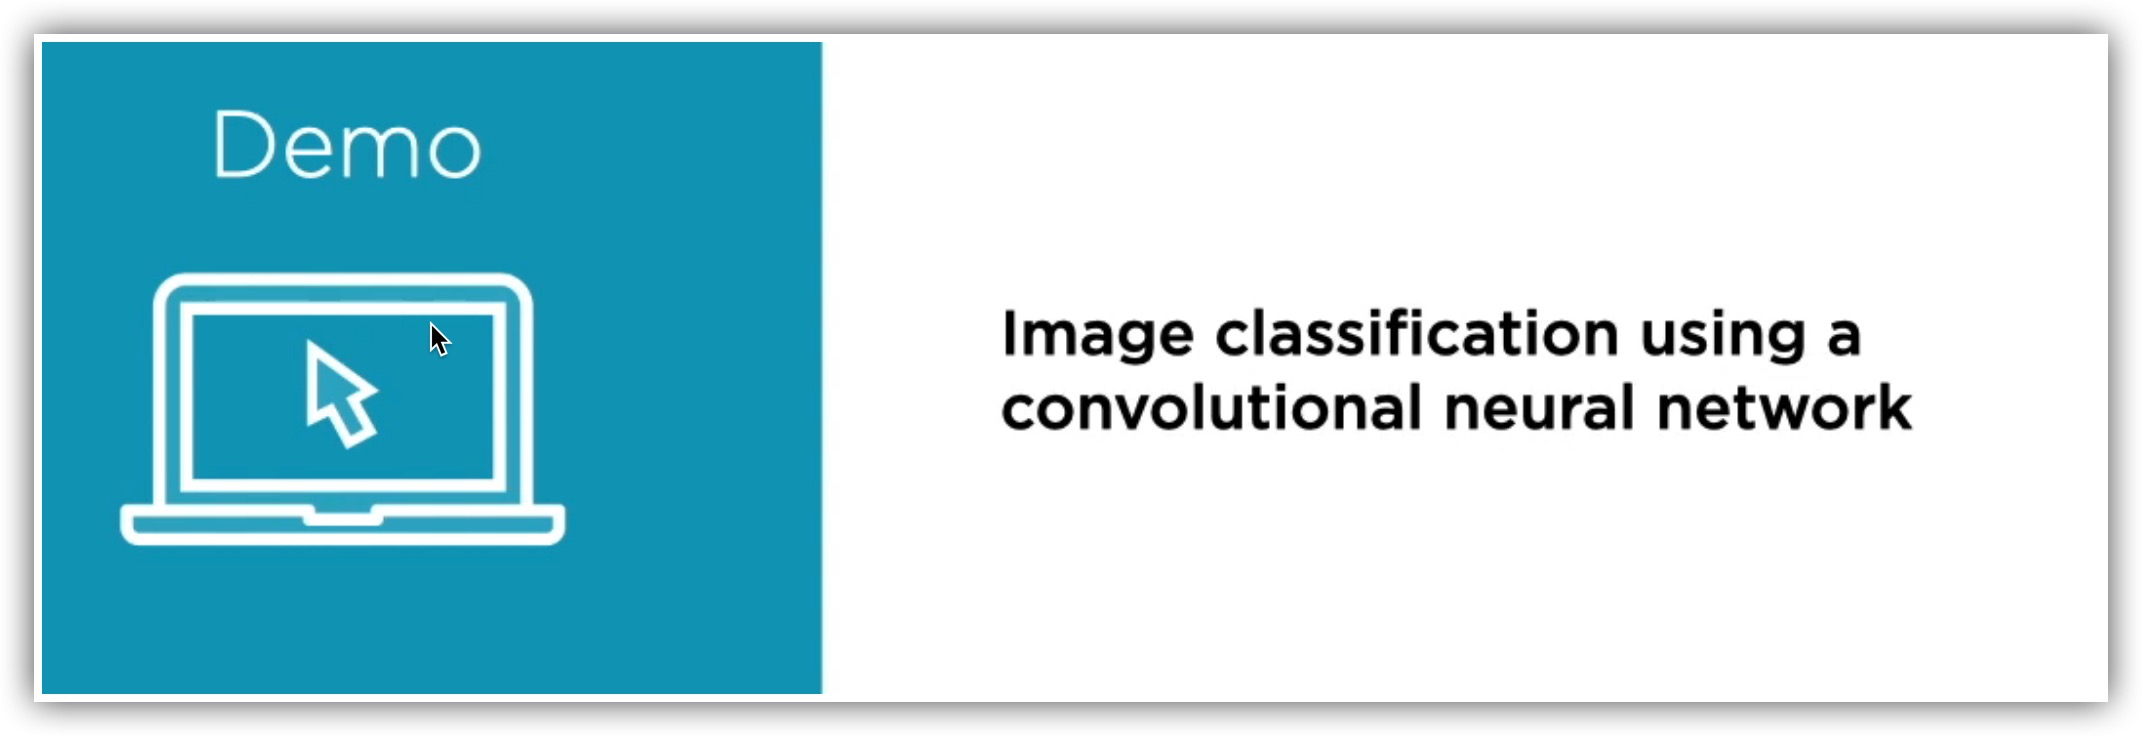

In [13]:
Image('/Users/subhasish/Development/GIT/Interstellar/SB-AI-DEV/DL/CNN/Pluralsight/Janani Ravi/Build a Machine Learning Workflow with Keras TensorFlow 2.0/SB/Images/2023-06-01_21-12-19.jpg')

In [4]:
'''
I'm going to use the opencv library to do some image processing.
!pip install opencv-python

Let's go ahead and load in the CIFAR‑10 dataset. 
The CIFAR‑10 dataset is a label subset of the 80 million tiny images dataset commonly 
used for image processing operations. 

The CIFAR‑10 dataset contains a total of 60,000 images categorized into 10 classes or categories. 

50,000 images make up the training data, and the remaining make up the test data in this dataset. 
CIFAR‑10 is available as a built‑in dataset in Keras, available at tf.keras.datasets.cifar10. 

You can invoke the load_data function on this dataset to get the training images and 
labels and the test_images and labels.
 '''

cifar_10 = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar_10.load_data()

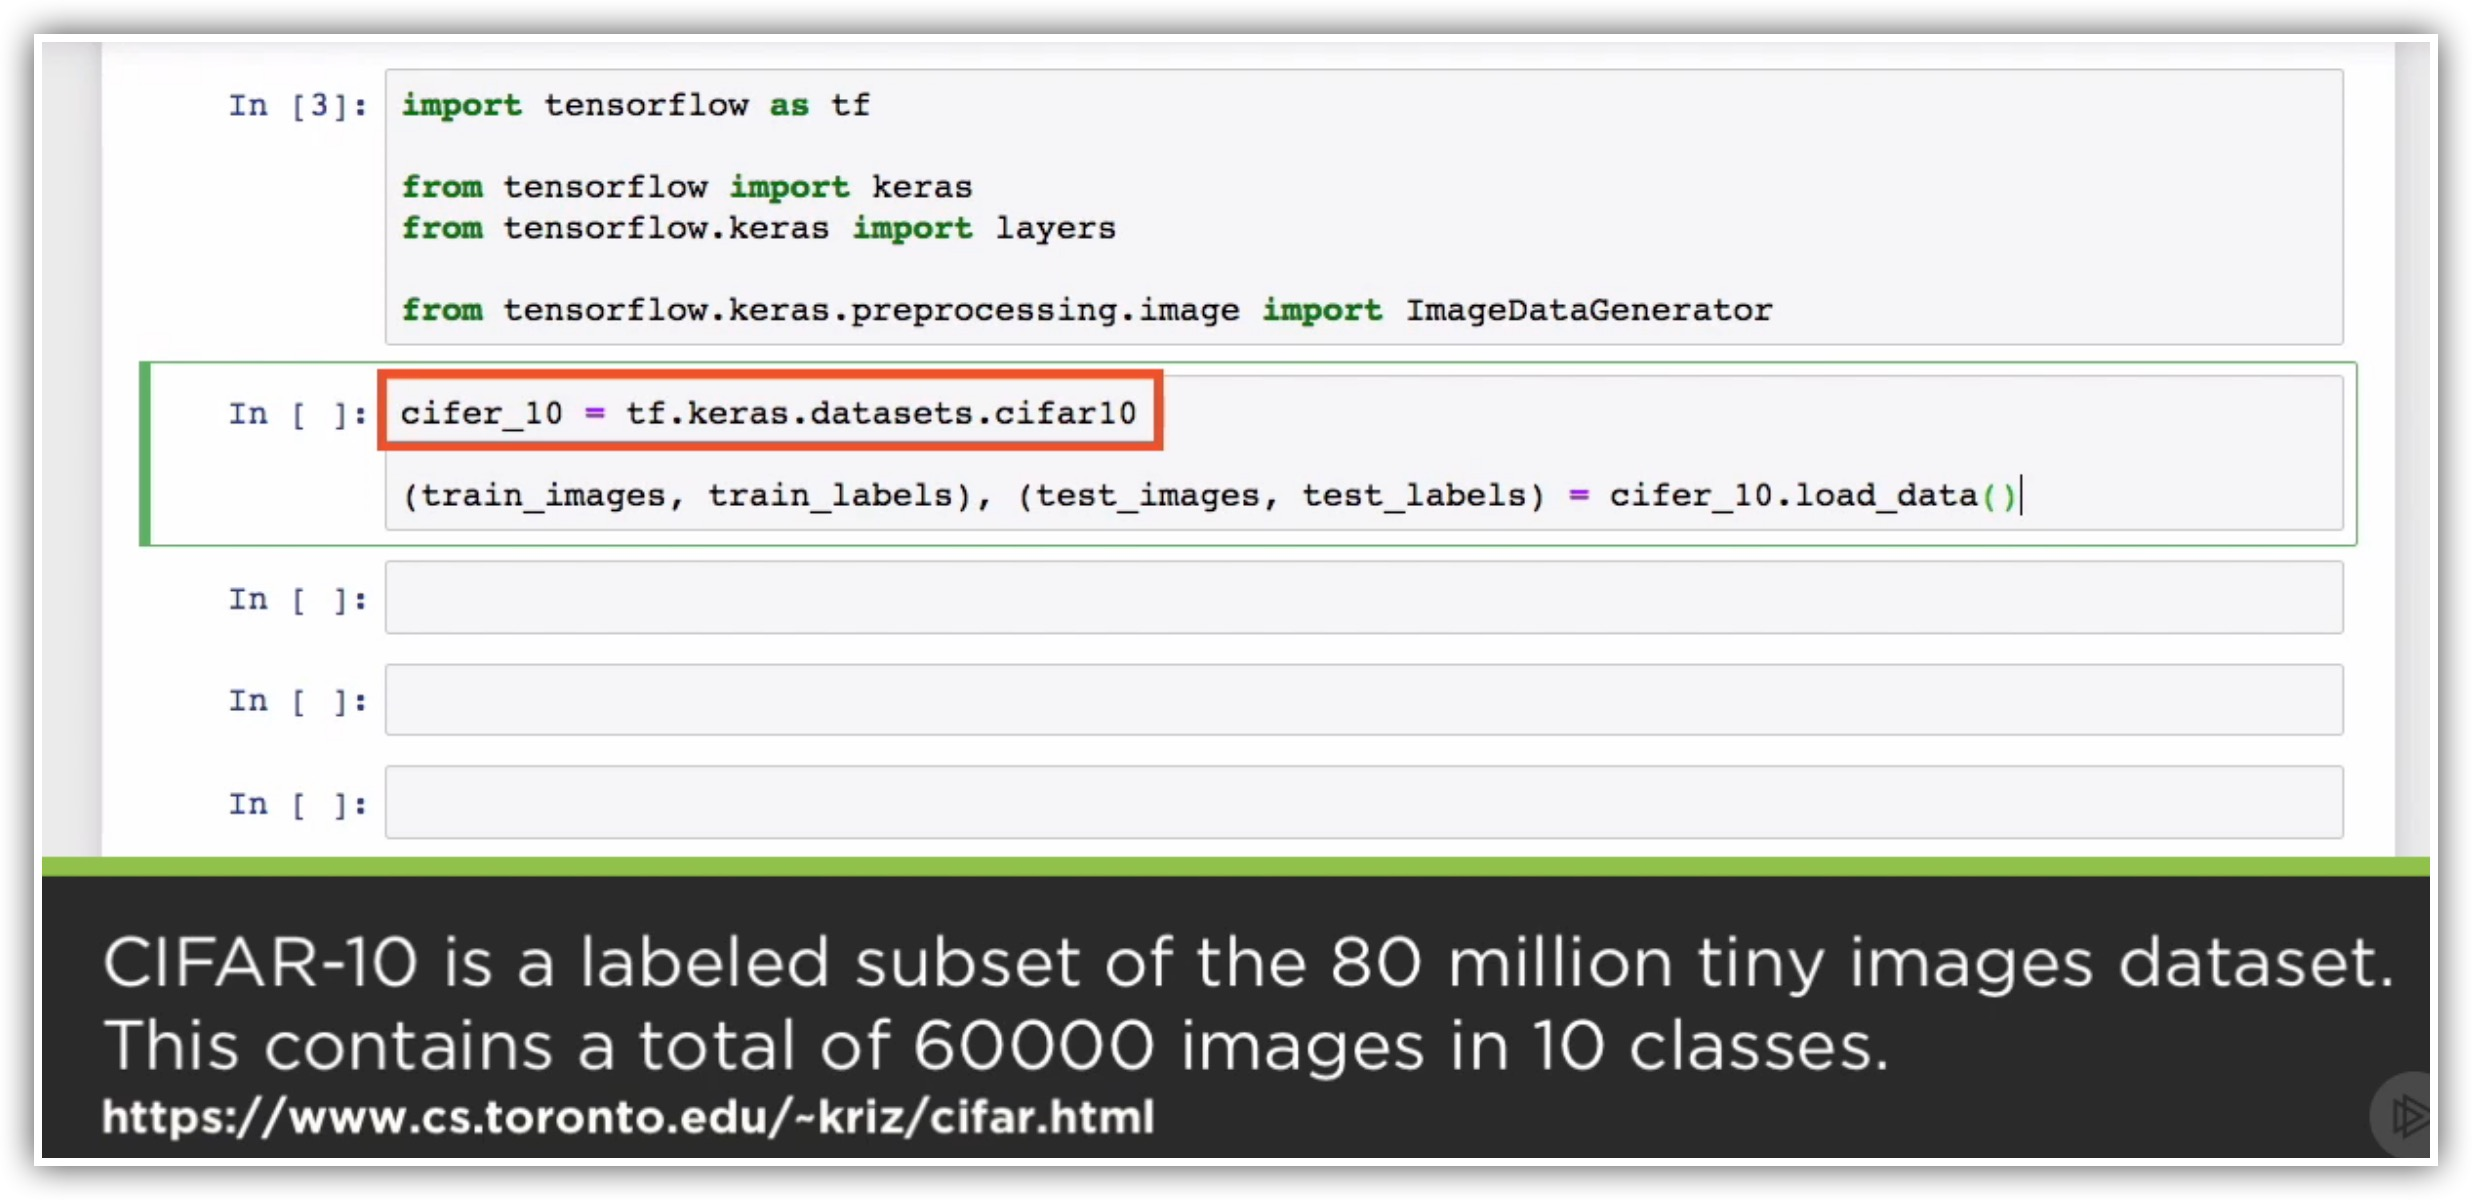

In [6]:
Image('/Users/subhasish/Development/GIT/Interstellar/SB-AI-DEV/DL/CNN/Pluralsight/Janani Ravi/Build a Machine Learning Workflow with Keras TensorFlow 2.0/SB/Images/2023-06-01_21-35-55.jpg')

In [5]:
'''
If you look at the shape of the train_images and test_images, you can see that we have 
50,000 images to train our model, 10,000 to test or evaluate our model. 

Each image is a 32 x 32 pixel image and has 3 channels. 
This is an RGB image or a color image. 
'''
train_images.shape, test_images.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [6]:
'''
 I'm going to access the first of these images in my training data at index 0, 
 and take a look at how the pixels in each of these images are represented. 
 
 You can see here that each of the R, G, and B channels in our image data contains 
 a pixel value in the range 0 to 255. 
'''
train_images[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [7]:
'''
We'll now look at the labels associated with each image in our training and test data. 
The labels are numeric values from 0 through 9, representing 10 classes. 
Each numeric ID corresponds to one dictionary. 
'''
train_labels[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [8]:
'''
 I'm going to set up a little look‑up list here of the 10 categories represented in this CIFAR‑10 dataset. 
 An image in this dataset could be of an airplane, an automobile, a bird, a cat, a dog, maybe a truck, or a ship. 
'''
lookup= ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [9]:
# In order to view and explore the images present in the CIFAR‑10 dataset, 
# I'll set up a helper function here called show_img, 
# which takes an images, labels, and the number of images that we want to display,selected 
# at random from the images data that we pass in. 
def show_img(images, labels, n_images):
    
    # I'm going to select images at random using the randint function.
    random_int = randint(0, labels.shape[0] - n_images)
    
    #'ll then store these randomly‑selected images in the images and labels variables, 
    # and use a matplotlib plot to plot these images onto screen, along with their corresponding labels from the data. 
    imgs, labels = images[random_int : random_int + n_images], labels[random_int : random_int +  n_images]
    
    _, figs = plt.subplots(1, n_images, figsize=(n_images * 3, 3))

    for fig, img, label in zip(figs, imgs, labels):
        fig.imshow(img)
        ax = fig.axes
        
        ax.set_title(lookup[int(label)])
        
        ax.title.set_fontsize(20)
        
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)


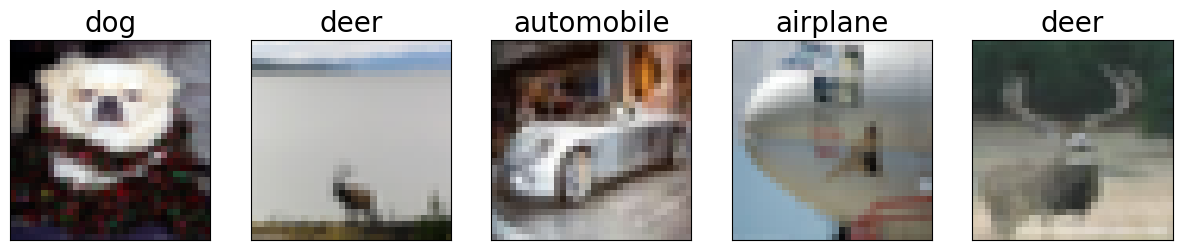

In [10]:
'''
With this function defined, I'll now select five images at random from my training 
data and display them onto screen, along with their labels. 

And here are some examples of the 32 x 32 color images that we'll use to train our image classification model. 
There is a frog there, a fire truck, deer, a horse, and so on.
'''
show_img(train_images, train_labels, 5)

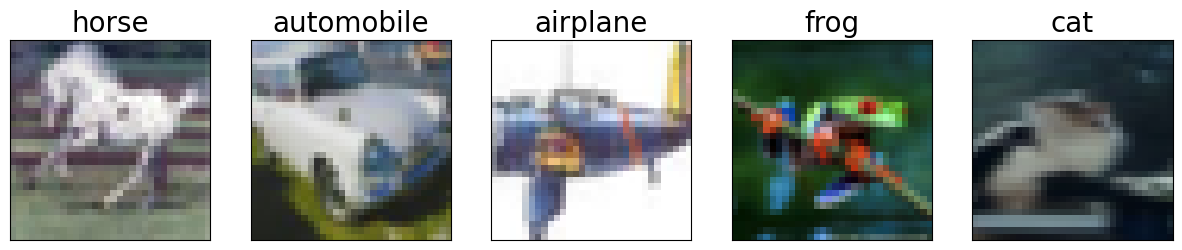

In [11]:
show_img(train_images, train_labels, 5)

In [12]:
'''
Now before we work with the CIFAR‑10 dataset, I'm going to store these images in different 
folders based on the image categories on my current working directory. 
'''

train_dir = './datasets/CNN/train/'
test_dir = './datasets/CNN/test/'

In [18]:
'''
Initialize the index i to 0, after which we'll run a for loop through every image 
in our training data and its corresponding label. 

The path we'll save this image out to depends on the category of the image. 
We'll use the label for that image in our lookup array to get the category, 
and use opencv to write the image out as a JPEG file to disk. Increment your 
index by 1 before we write out the next image. 
'''
'''
i = 0

for img, label in zip(train_images, train_labels):
    
    path = train_dir + str(lookup[int(label)])
    
    cv2.imwrite(os.path.join(path, str(i) + '.jpeg'), img)
    
    i += 1
    cv2.waitKey(0)

'''

In [ ]:
'''
Now that we have all of our training images on disk, I'll do the same thing for our test images, 
write them all out to the test sub directory. 

Now that we have the CIFAR‑10 dataset on our local machine, we can use the ImageDataGenerator 
object in order to read in these files and process them. 

i = 0

for img, label in zip(test_images, test_labels):

    path = test_dir + str(lookup[int(label)])
    
    cv2.imwrite(os.path.join(path, str(i) + '.jpeg'), img)
 
    i += 1
    
    cv2.waitKey(0)

'''

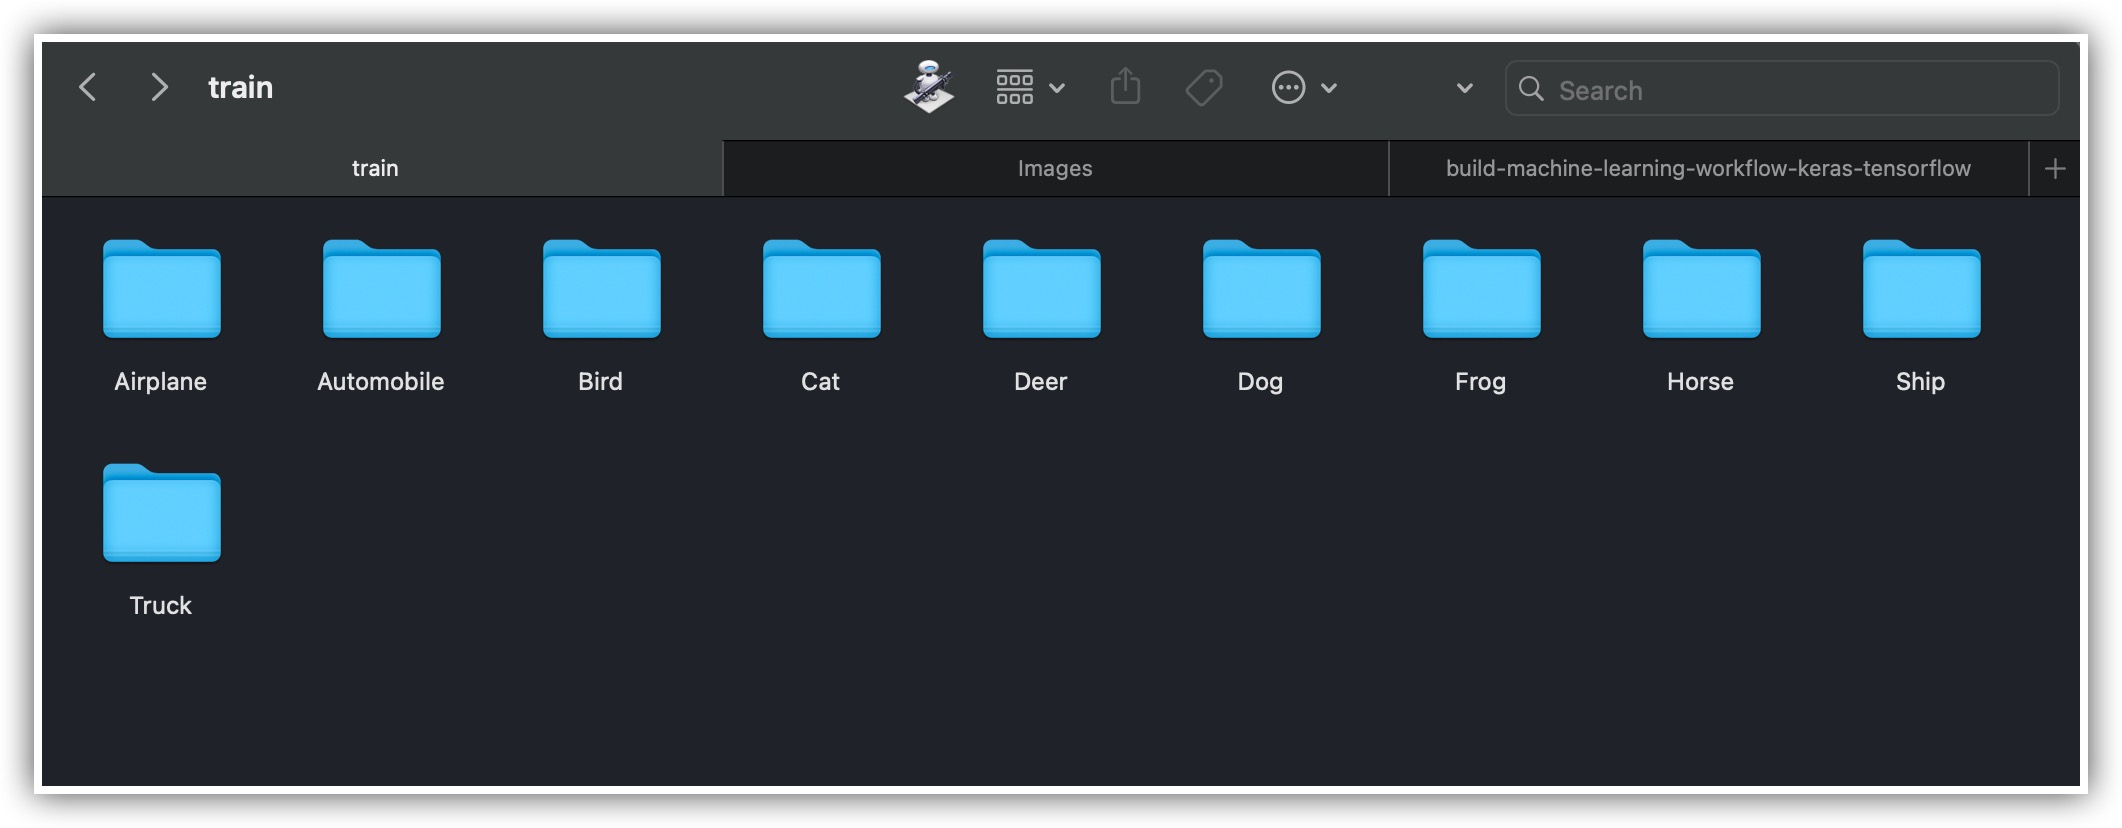

In [13]:
'''
if you head over to your current working directory, you'll find that all of your category sub folders 
have now been populated. 

In fact, you only need to create the train and test sub folders, opencv will automatically 
create the category sub folders for you. 
'''
Image('/Users/subhasish/Development/GIT/Interstellar/SB-AI-DEV/DL/CNN/Pluralsight/Janani Ravi/Build a Machine Learning Workflow with Keras TensorFlow 2.0/SB/Images/2023-06-01_21-58-14.jpg')

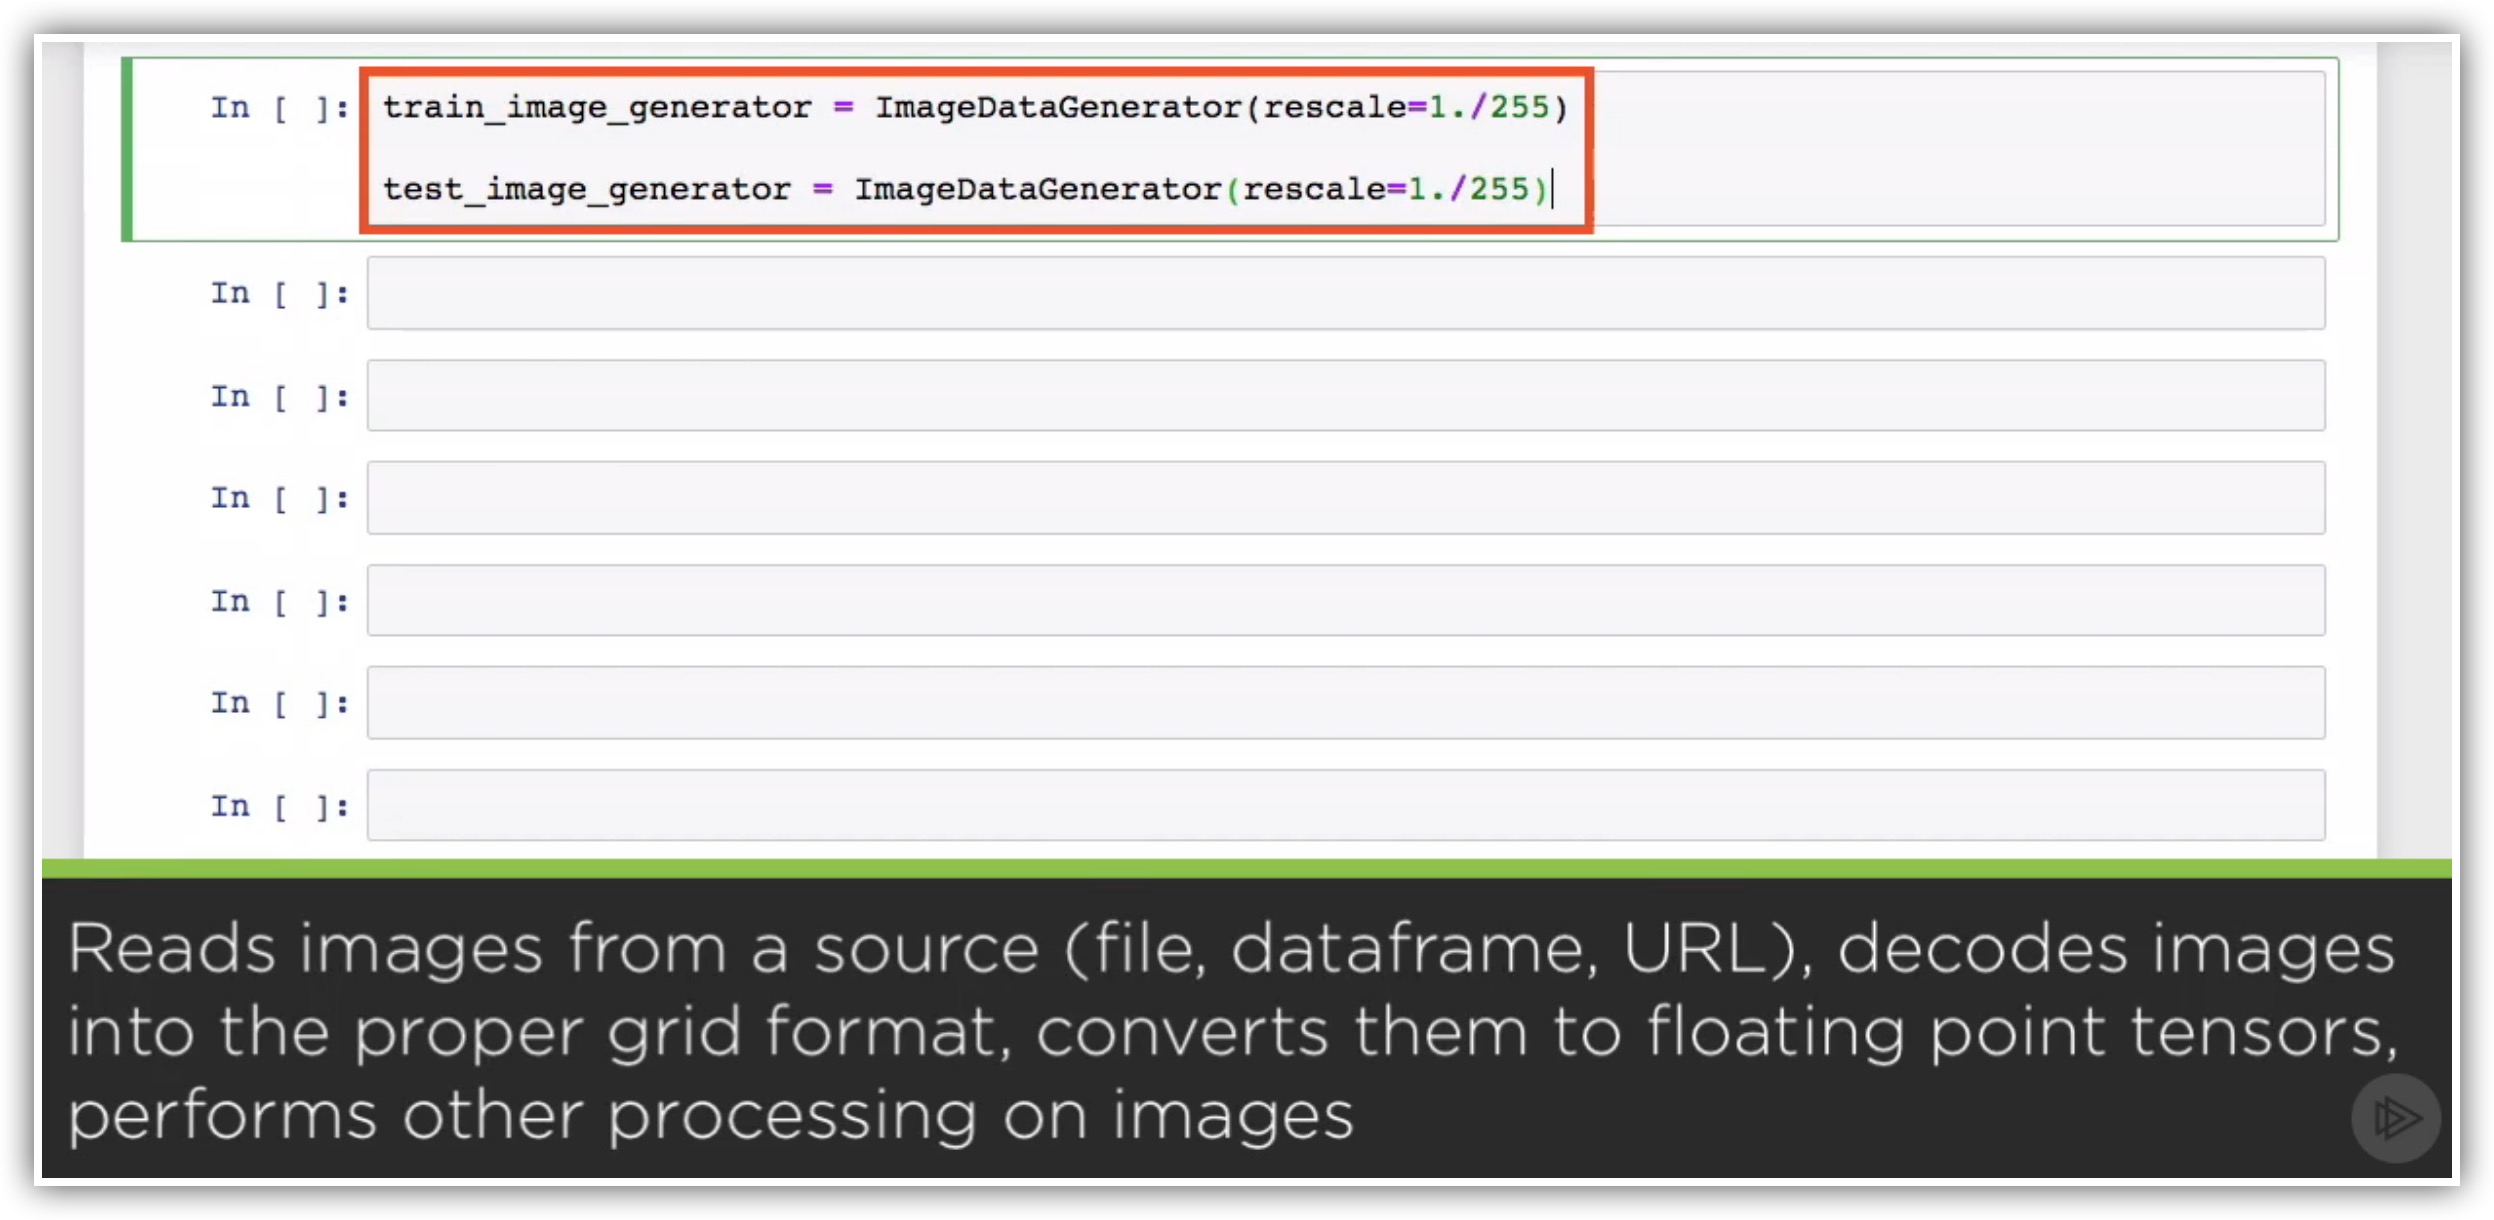

In [14]:
Image('/Users/subhasish/Development/GIT/Interstellar/SB-AI-DEV/DL/CNN/Pluralsight/Janani Ravi/Build a Machine Learning Workflow with Keras TensorFlow 2.0/SB/Images/2023-06-01_22-02-27.jpg')

### Data Preparation

Format the images into appropriately pre-processed floating point tensors before feeding to the network:

* Read images from the disk.
* Decode contents of these images and convert it into proper grid format as per their RGB content.
* Convert them into floating point tensors.
* Rescale the tensors from values between 0 and 255 to values between 0 and 1, as neural networks prefer to deal with small input values.

Fortunately, all these tasks can be done with the `ImageDataGenerator` class provided by tf.keras.

In [15]:
'''
ImageDataGenerator allows you to read images from any source, whether it's a file, a data frame, 
or a URL, it decodes these images to be in the proper grid or matrix format that TensorFlow understands, 
converts them to floating point tensors, and performs other processing on images. 

The only processing that I've specified here is a re‑scaling of the pixel values of images, 
so that we divide all pixel values by 255. 

This will express all pixel values as a decimal between 0 and 1. 

Machine‑learning models generally tend to perform better when data is expressed in 
small values, as fractions, rather than large numbers.
'''
train_image_generator = ImageDataGenerator(rescale=1./255)

test_image_generator = ImageDataGenerator(rescale=1./255)

In [16]:
'''
I'll specify a batch_size of 128 in order to feed in my training data to my machine‑learning model. 
'''
batch_size = 128

In [17]:
'''
We'll then use the train_image_generator_flow_from_directory method in order to read in images 
from our local machine. 

Shuffle equal to true will shuffle the data as it's read in, 
it'll not read in category by category. 50,000 images were found belonging to 10 classes, 
read in the test data as well using the test_image_generator.

After defining the generators for training and validation images, the flow_from_directory method loads 
images from the disk, applies rescaling, and resizes the images into the required dimension. 

We haven't applied any data augmentation techniques here, we'll work with the images as is.
'''
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(32, 32))

Found 50000 images belonging to 10 classes.


In [18]:
'''
We'll shuffle the test data as well. This will give us 10,000 images belonging to 10 classes or categories.
'''
test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                         directory=test_dir,
                                                         shuffle=True,
                                                         target_size=(32, 32))

Found 10000 images belonging to 10 classes.


In [19]:
'''
Let's take a look at one batch of data by invoking the next function on the train_data_generator. 
Images used to train a TensorFlow model are specified as a four‑dimensional tensor. 

The first dimension represents the number of images in a batch. The next two dimensions 
represent the height and width of each image, and finally, the last dimension refers 
to the number of channels for an individual image. 

This is a 3‑channel image, an RGB image, a color image.
'''
sample_batch = next(train_data_gen)

sample_batch[0].shape

(128, 32, 32, 3)